In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
from matplotlib import pyplot as plt

## import data

In [2]:
df = pd.read_csv('../../../Machine Learning/project library/Medical Cost/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## missing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.apply(lambda x: x.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.apply(lambda x: x.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## charges central tendency

In [6]:
np.mean(df['charges']), np.median(df['charges'])

(13270.422265141257, 9382.033)

## bmi central tendency

In [7]:
np.mean(df['bmi']), np.median(df['bmi'])

(30.66339686098655, 30.4)

## class balance

In [8]:
age = df.groupby(by='age')[['sex']].count().reset_index()
age.rename(columns={'sex':'count'}).T

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
age,18,19,20,21,22,23,24,25,26,27,...,55,56,57,58,59,60,61,62,63,64
count,69,68,29,28,28,28,28,28,28,28,...,26,26,26,25,25,23,23,23,23,22


In [9]:
sex = df.groupby(by='sex')[['bmi']].count().reset_index()
sex.rename(columns={'bmi':'count'})

,sex,count
0,female,662
1,male,676


In [10]:
smoker = df.groupby(by='smoker')[['region']].count().reset_index()
smoker.rename(columns={'region':'count'})

,smoker,count
0,no,1064
1,yes,274


In [11]:
region = df.groupby(by='region')[['sex']].count().reset_index()
region.rename(columns={'sex':'count'})

,region,count
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


## variance and deviation

In [12]:
# variance
np.var(df,axis=0)

age         1.972539e+02
bmi         3.716009e+01
children    1.452127e+00
charges     1.465428e+08
dtype: float64

In [13]:
# standard deviation
np.std(df,axis=0)

age            14.044709
bmi             6.095908
children        1.205042
charges     12105.484976
dtype: float64

## visualize distribution

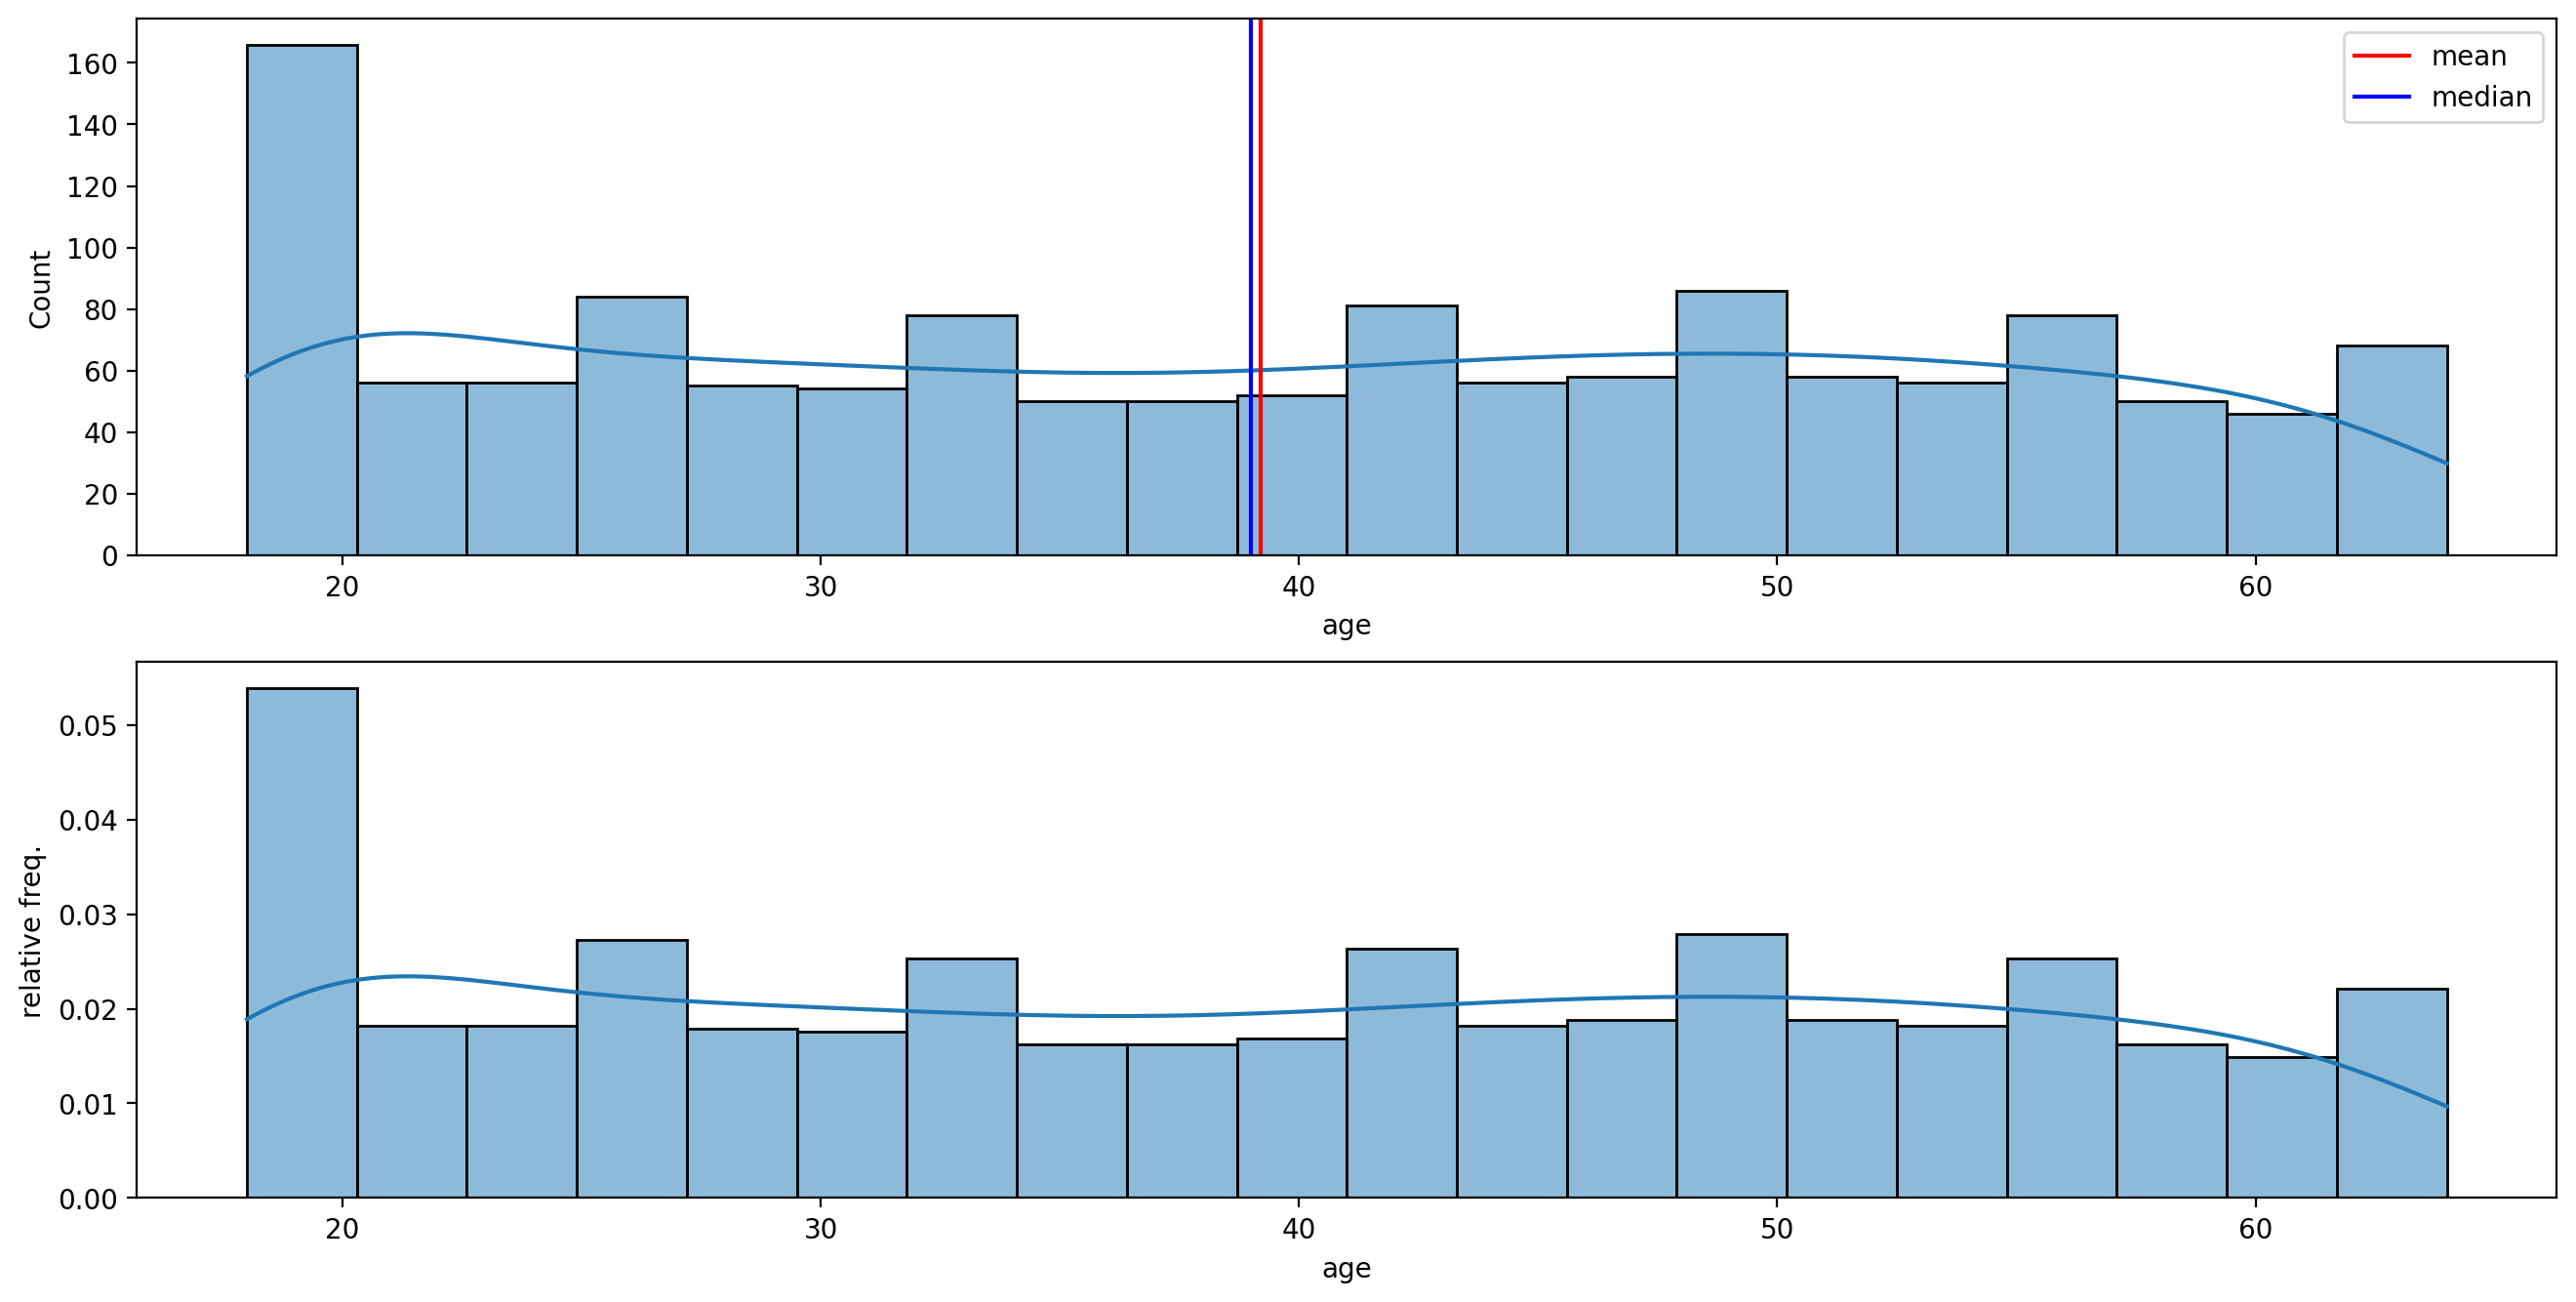

In [14]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=[16,8],dpi=200)
ax = axes.ravel()
sns.histplot(df['age'],kde=True,bins=20,ax=ax[0])
ax[0].axvline(np.mean(df['age']),color='r',label='mean')
ax[0].axvline(np.median(df['age']),color='b',label='median')
ax[0].legend()
plt.ylabel('freq.')
sns.histplot(df['age'],kde=True,bins=20,stat='density',ax=ax[1])
plt.ylabel('relative freq.')
plt.show()

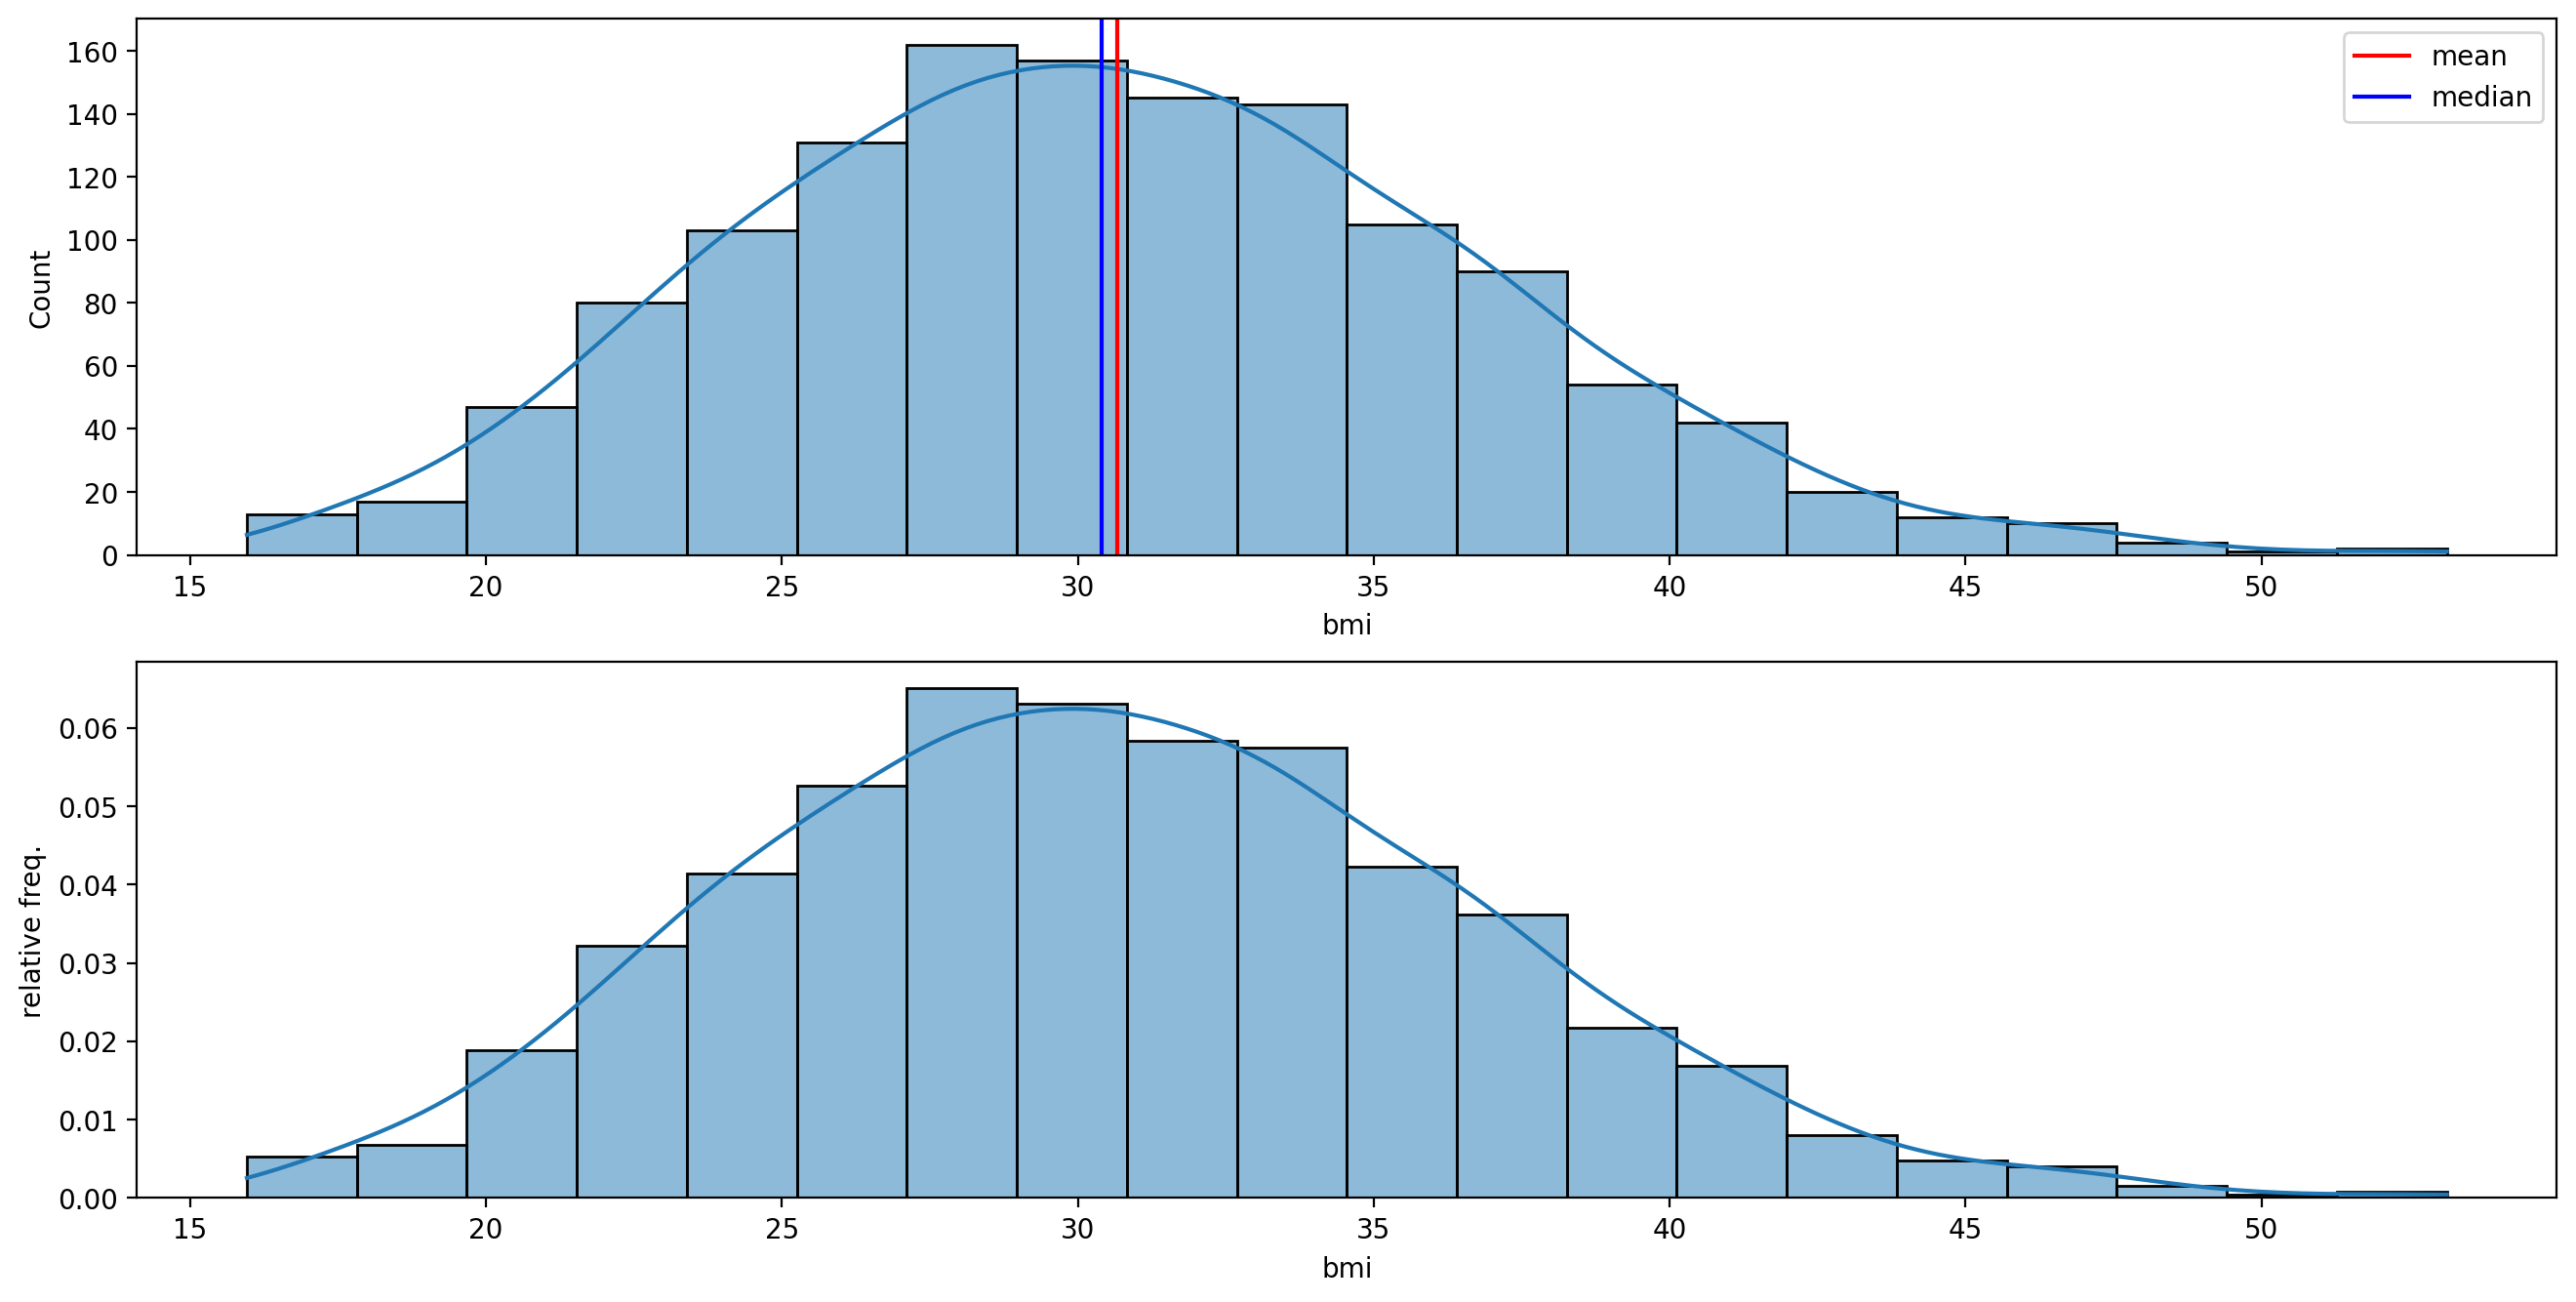

In [15]:
fig_1,axes = plt.subplots(nrows=2,ncols=1,figsize=[16,8],dpi=200)
ax = axes.ravel()
sns.histplot(df['bmi'],kde=True,bins=20,ax=ax[0])
ax[0].axvline(np.mean(df['bmi']),color='r',label='mean')
ax[0].axvline(np.median(df['bmi']),color='b',label='median')
ax[0].legend()
plt.ylabel('freq.')
sns.histplot(df['bmi'],kde=True,bins=20,stat='density',ax=ax[1])
plt.ylabel('relative freq.')
plt.show()

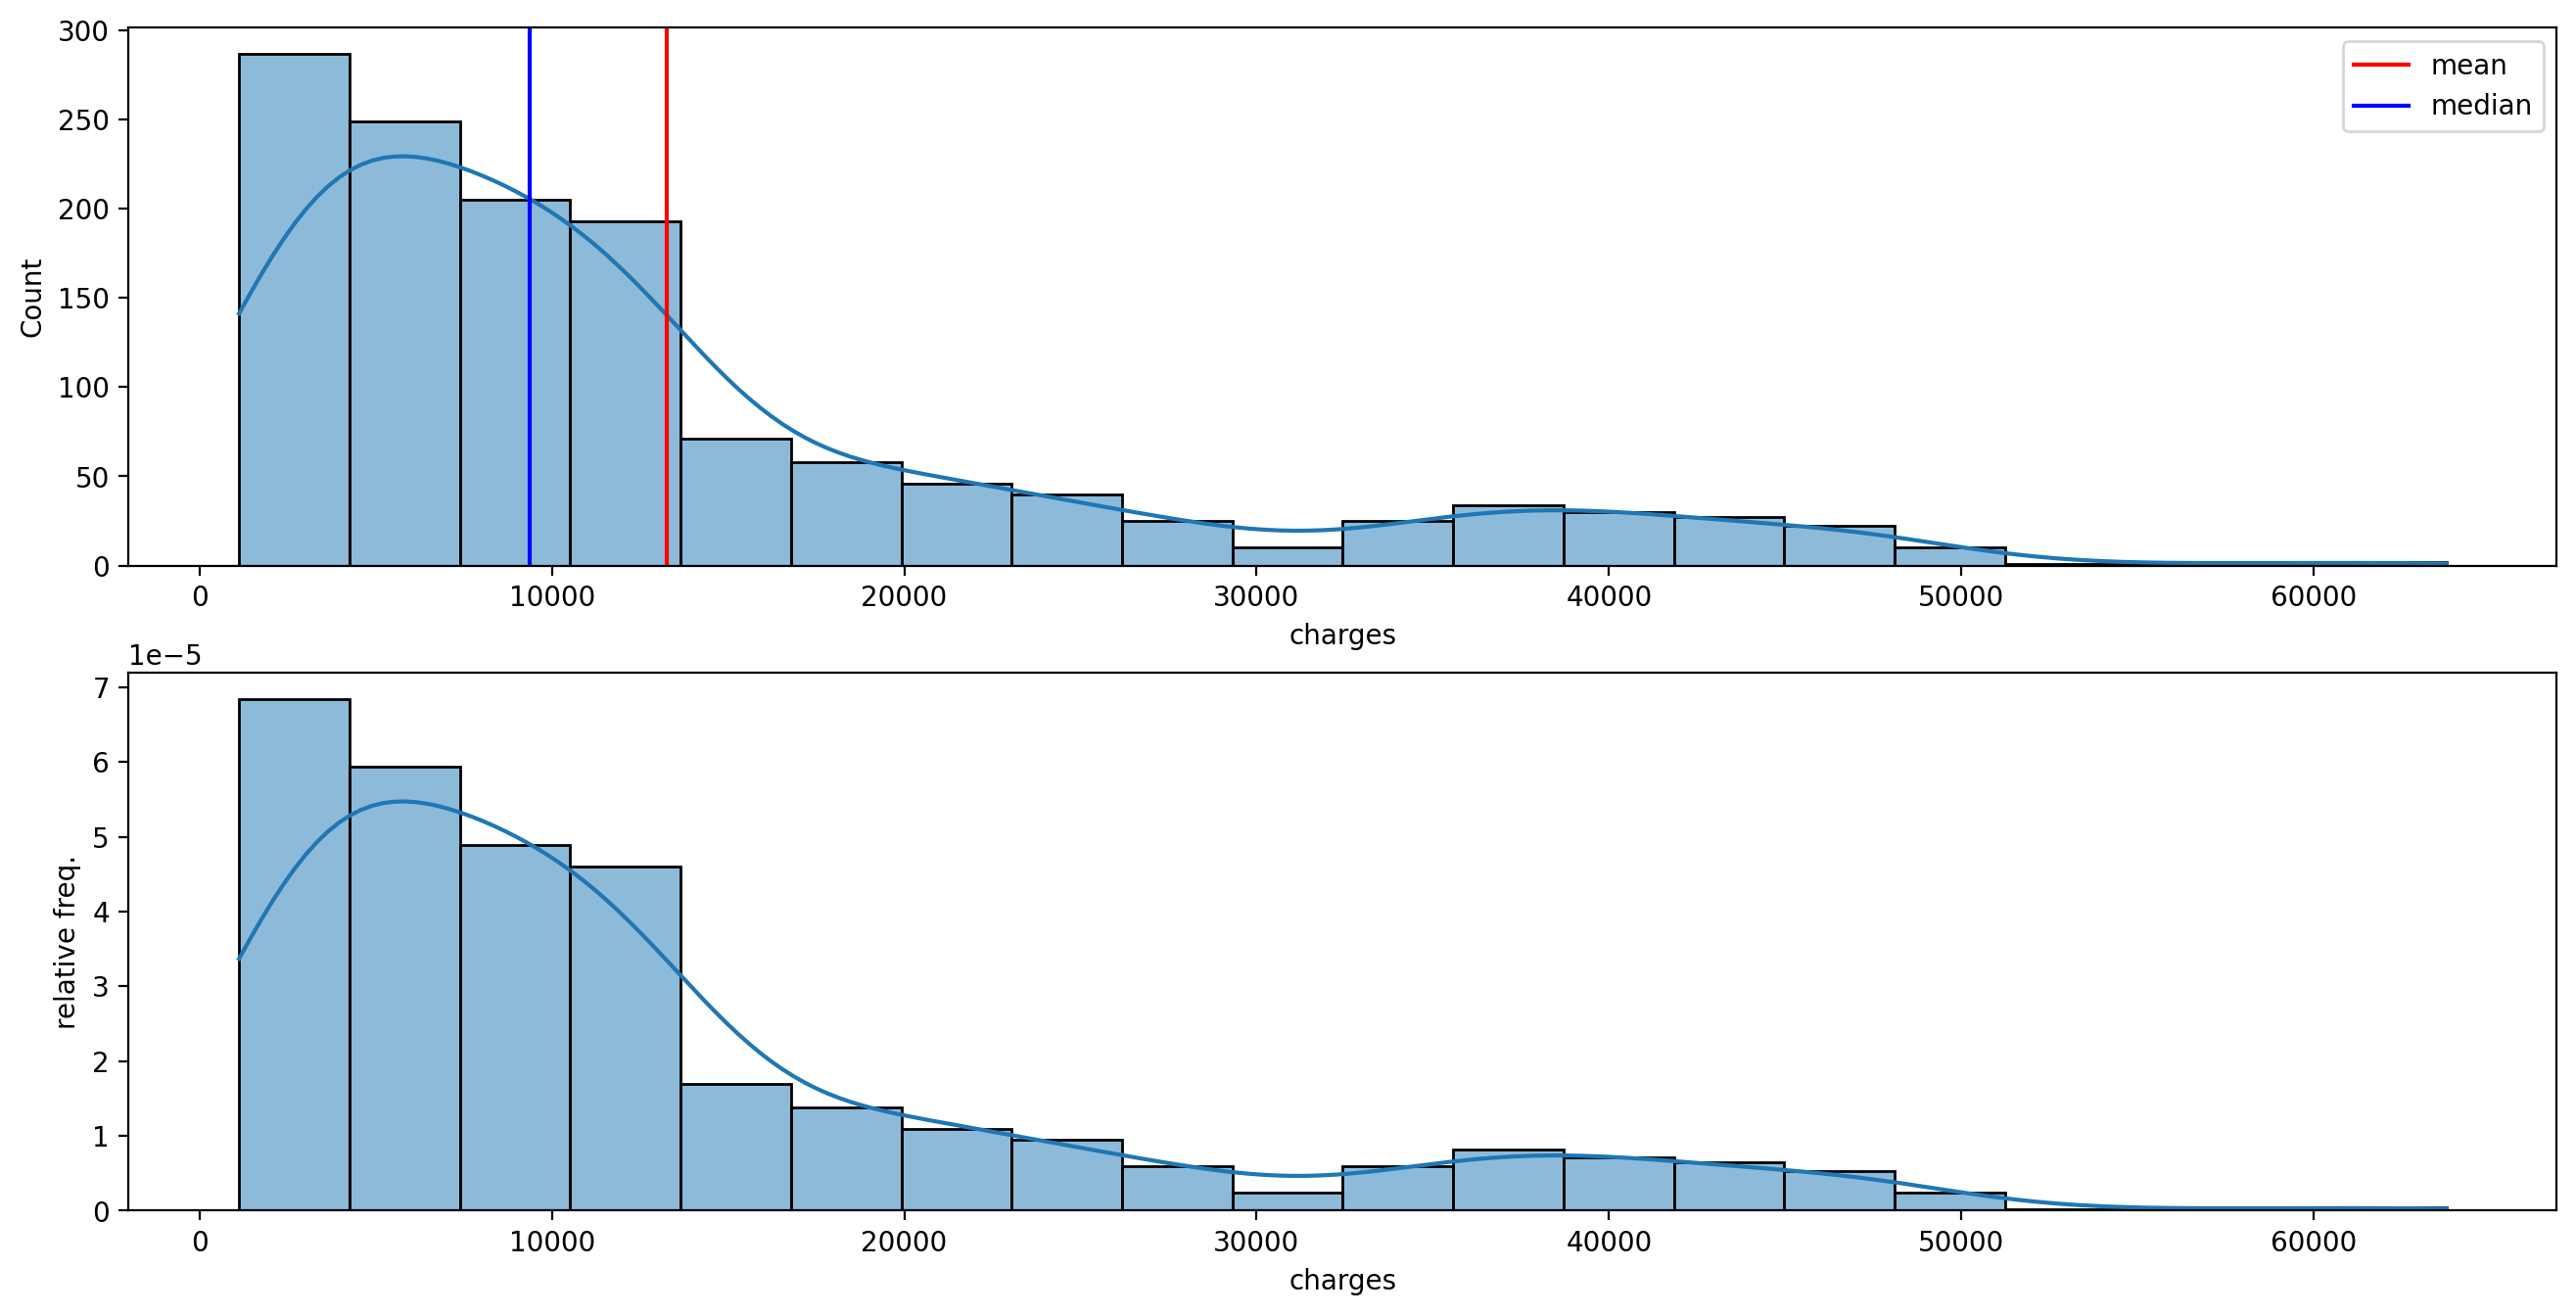

In [16]:
fig_2,axes = plt.subplots(nrows=2,ncols=1,figsize=[16,8],dpi=200)
ax = axes.ravel()
sns.histplot(df['charges'],kde=True,bins=20,ax=ax[0])
ax[0].axvline(np.mean(df['charges']),color='r',label='mean')
ax[0].axvline(np.median(df['charges']),color='b',label='median')
ax[0].legend()
plt.ylabel('freq.')
sns.histplot(df['charges'],kde=True,bins=20,stat='density',ax=ax[1])
plt.ylabel('relative freq.')
plt.show()

## percentile

In [17]:
df.describe().loc[['25%','50%','75%']]

,age,bmi,children,charges
25%,27.0,26.29625,0.0,4740.287150
50%,39.0,30.40000,1.0,9382.033000
75%,51.0,34.69375,2.0,16639.912515


## quartiles

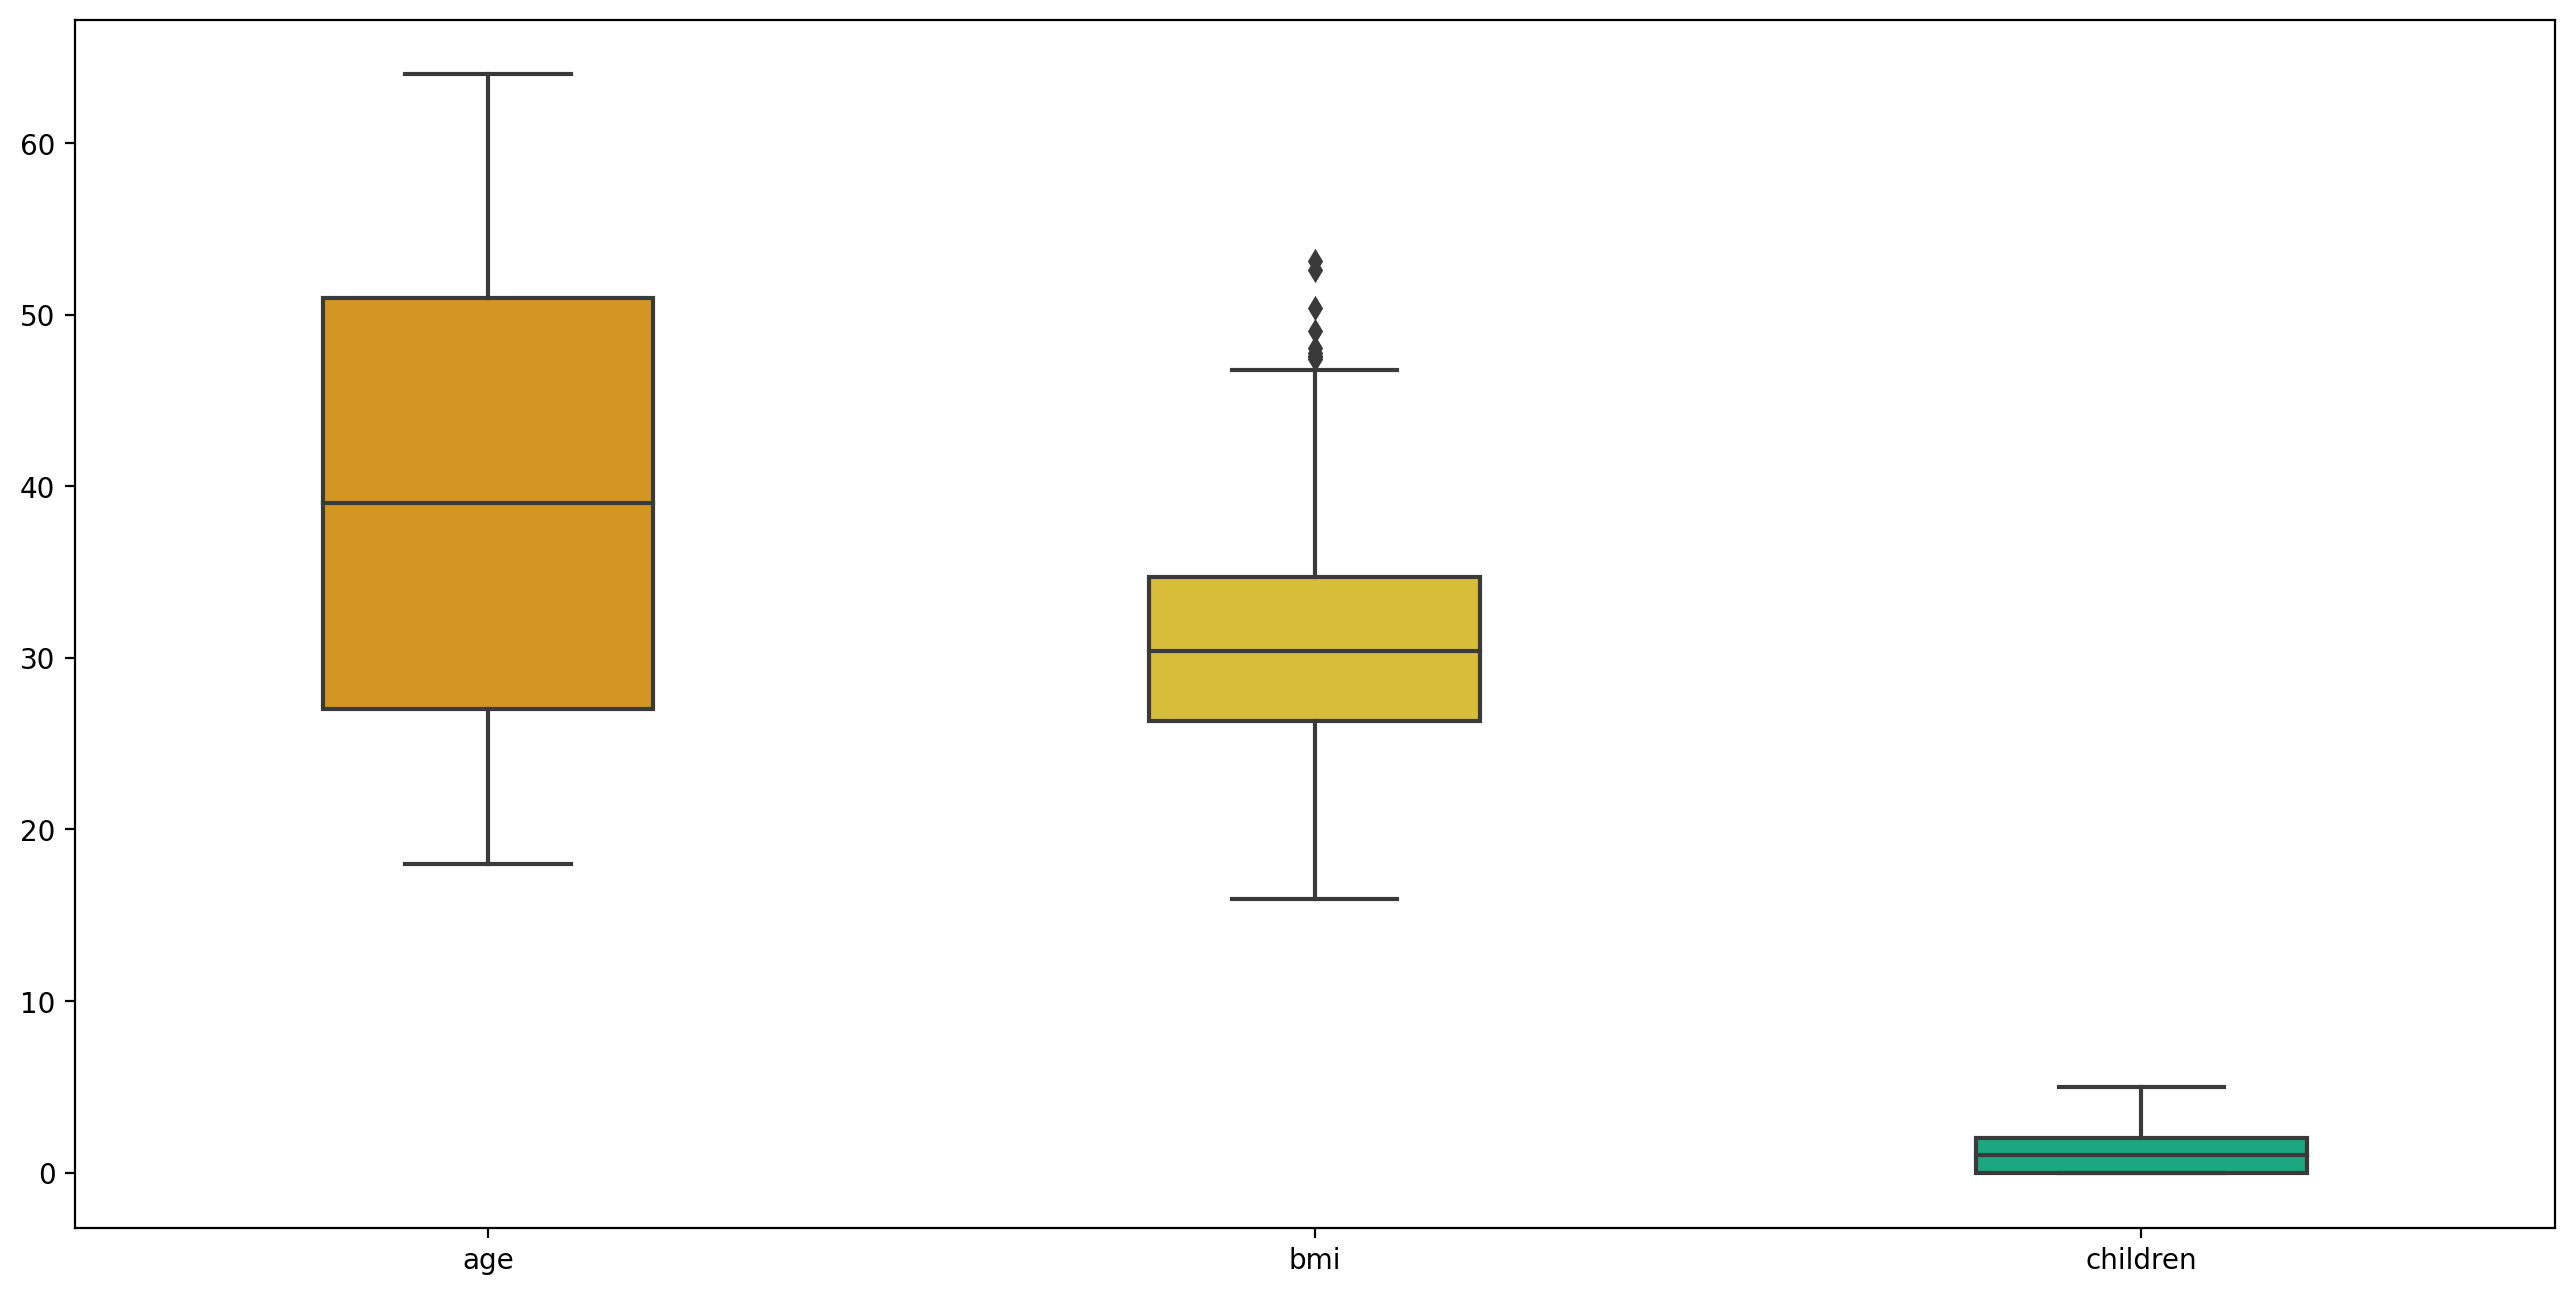

In [18]:
plt.figure(figsize=[16,8],dpi=200)
sns.boxplot(data=df[['age','bmi','children']],width=0.4,palette=['#F29F05','#F2CF1D','#04BF8A'])
plt.show()

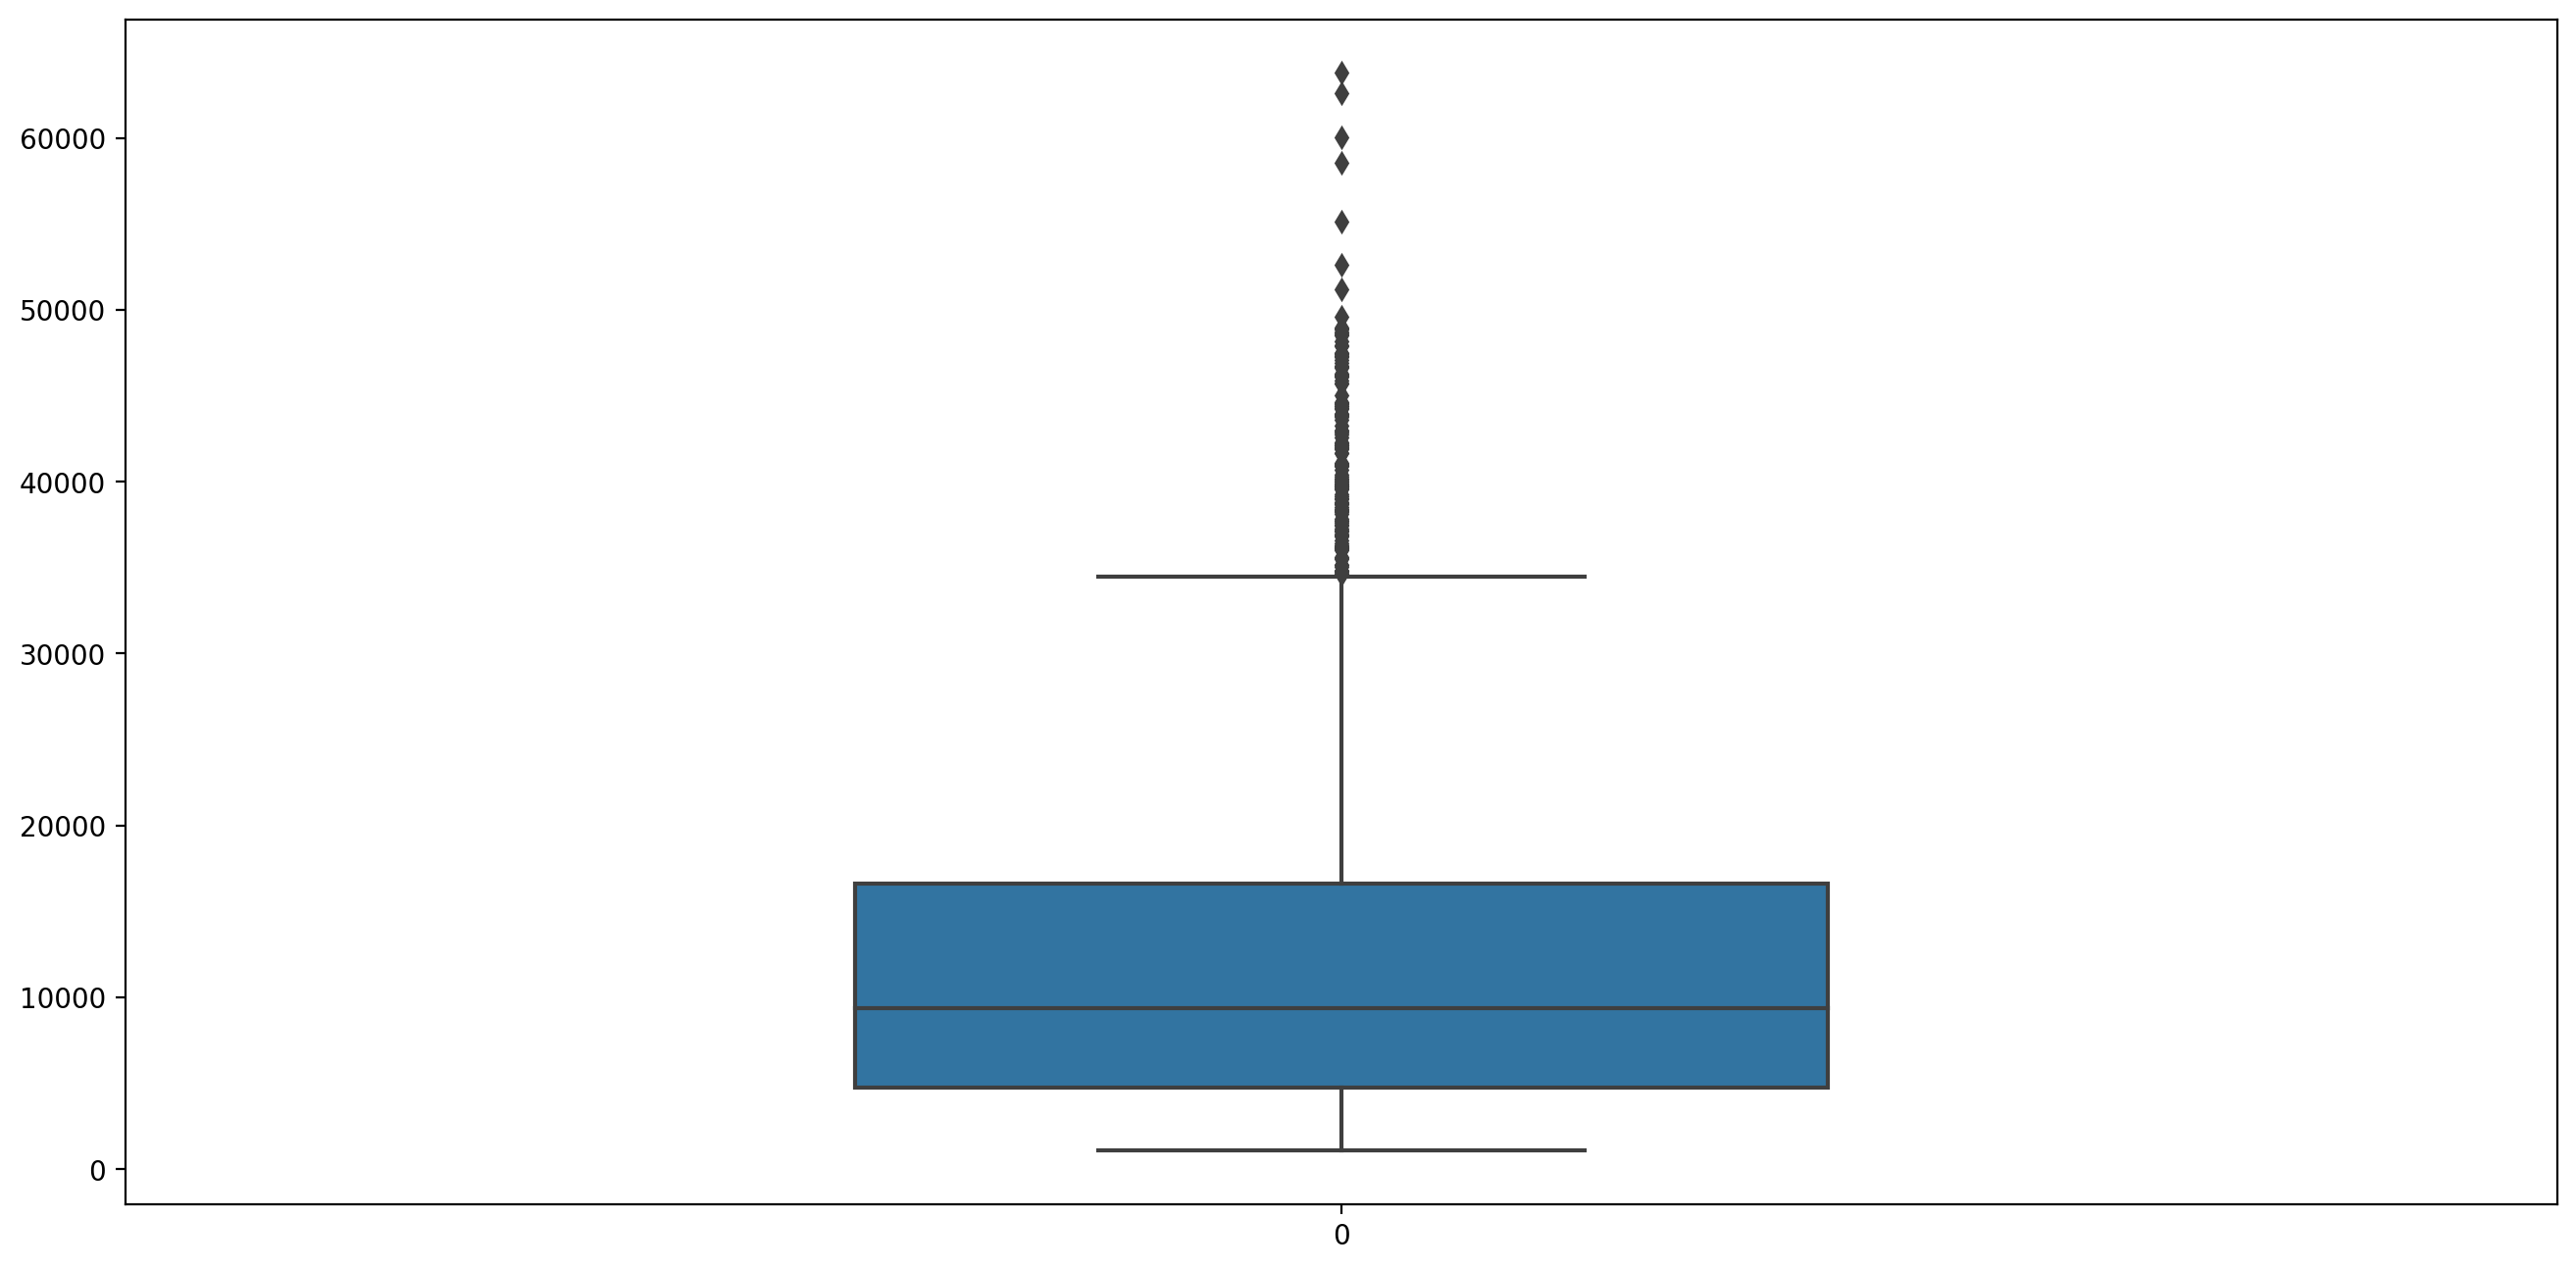

In [19]:
plt.figure(figsize=[16,8],dpi=200)
sns.boxplot(data=df['charges'],width=0.4)
plt.show()

## outliers

In [20]:
# using z-score
age_zScore = np.abs(st.zscore(df['age']))
df.iloc[np.where(age_zScore>=3)]

,age,sex,bmi,children,smoker,region,charges


In [21]:
bmi_zScore = np.abs(st.zscore(df['bmi']))
df.iloc[np.where(bmi_zScore>=3)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [22]:
children_zScore = np.abs(st.zscore(df['children']))
df.iloc[np.where(children_zScore>=3)]

,age,sex,bmi,children,smoker,region,charges
32,19,female,28.600,5,no,southwest,4687.79700
71,31,male,28.500,5,no,northeast,6799.45800
166,20,female,37.000,5,no,southwest,4830.63000
413,25,male,23.900,5,no,southwest,5080.09600
425,45,male,24.310,5,no,southeast,9788.86590
438,52,female,46.750,5,no,southeast,12592.53450
568,49,female,31.900,5,no,southwest,11552.90400
640,33,male,42.400,5,no,southwest,6666.24300
877,33,male,33.440,5,no,southeast,6653.78860
932,46,male,25.800,5,no,southwest,10096.97000


In [23]:
charges_zScore = np.abs(st.zscore(df['charges']))
df.iloc[np.where(charges_zScore>=3)]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [24]:
def modified_zScore(data):
    median_ = np.median(data)
    mad = np.median(data.apply(lambda x: np.abs(x - median_)))
    z_score = list(data.apply(lambda x: 0.6745*(x - median_)/mad))

    return z_score

In [25]:
age_zScore = np.abs(modified_zScore(df['age']))
df.iloc[np.where(age_zScore>=3)]

,age,sex,bmi,children,smoker,region,charges


In [26]:
children_zScore = np.abs(modified_zScore(df['children']))
df.iloc[np.where(children_zScore>=3)]

,age,sex,bmi,children,smoker,region,charges


In [27]:
charges_zScore = np.abs(modified_zScore(df['charges']))
df.iloc[np.where(charges_zScore>=3)]

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,36397.57600


In [28]:
# using IQR
def outlier_by_IQR(data):
    q1,q3 = np.quantile(data,[.25,.75])
    iqr = q3 - q1
    lw = q1 - 1.5*iqr
    uw = q3 + 1.5*iqr
    outliers = data.iloc[np.where((data<lw) | (data>uw))]

    return outliers

In [29]:
df.iloc[np.where(outlier_by_IQR(df['age']))]

,age,sex,bmi,children,smoker,region,charges


In [30]:
df.iloc[np.where(outlier_by_IQR(df['children']))]

,age,sex,bmi,children,smoker,region,charges


In [31]:
df.iloc[np.where(outlier_by_IQR(df['charges']))]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
134,20,female,28.785,0,no,northeast,2457.21115
135,22,female,28.050,0,no,southeast,2155.68150
136,19,male,34.100,0,no,southwest,1261.44200
137,22,male,25.175,0,no,northwest,2045.68525


## features

In [32]:
# data types
# numerical
df.select_dtypes(include=np.number).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [33]:
# categorical
df.select_dtypes(include=np.object).columns

Index(['sex', 'smoker', 'region'], dtype='object')

## uni-variant

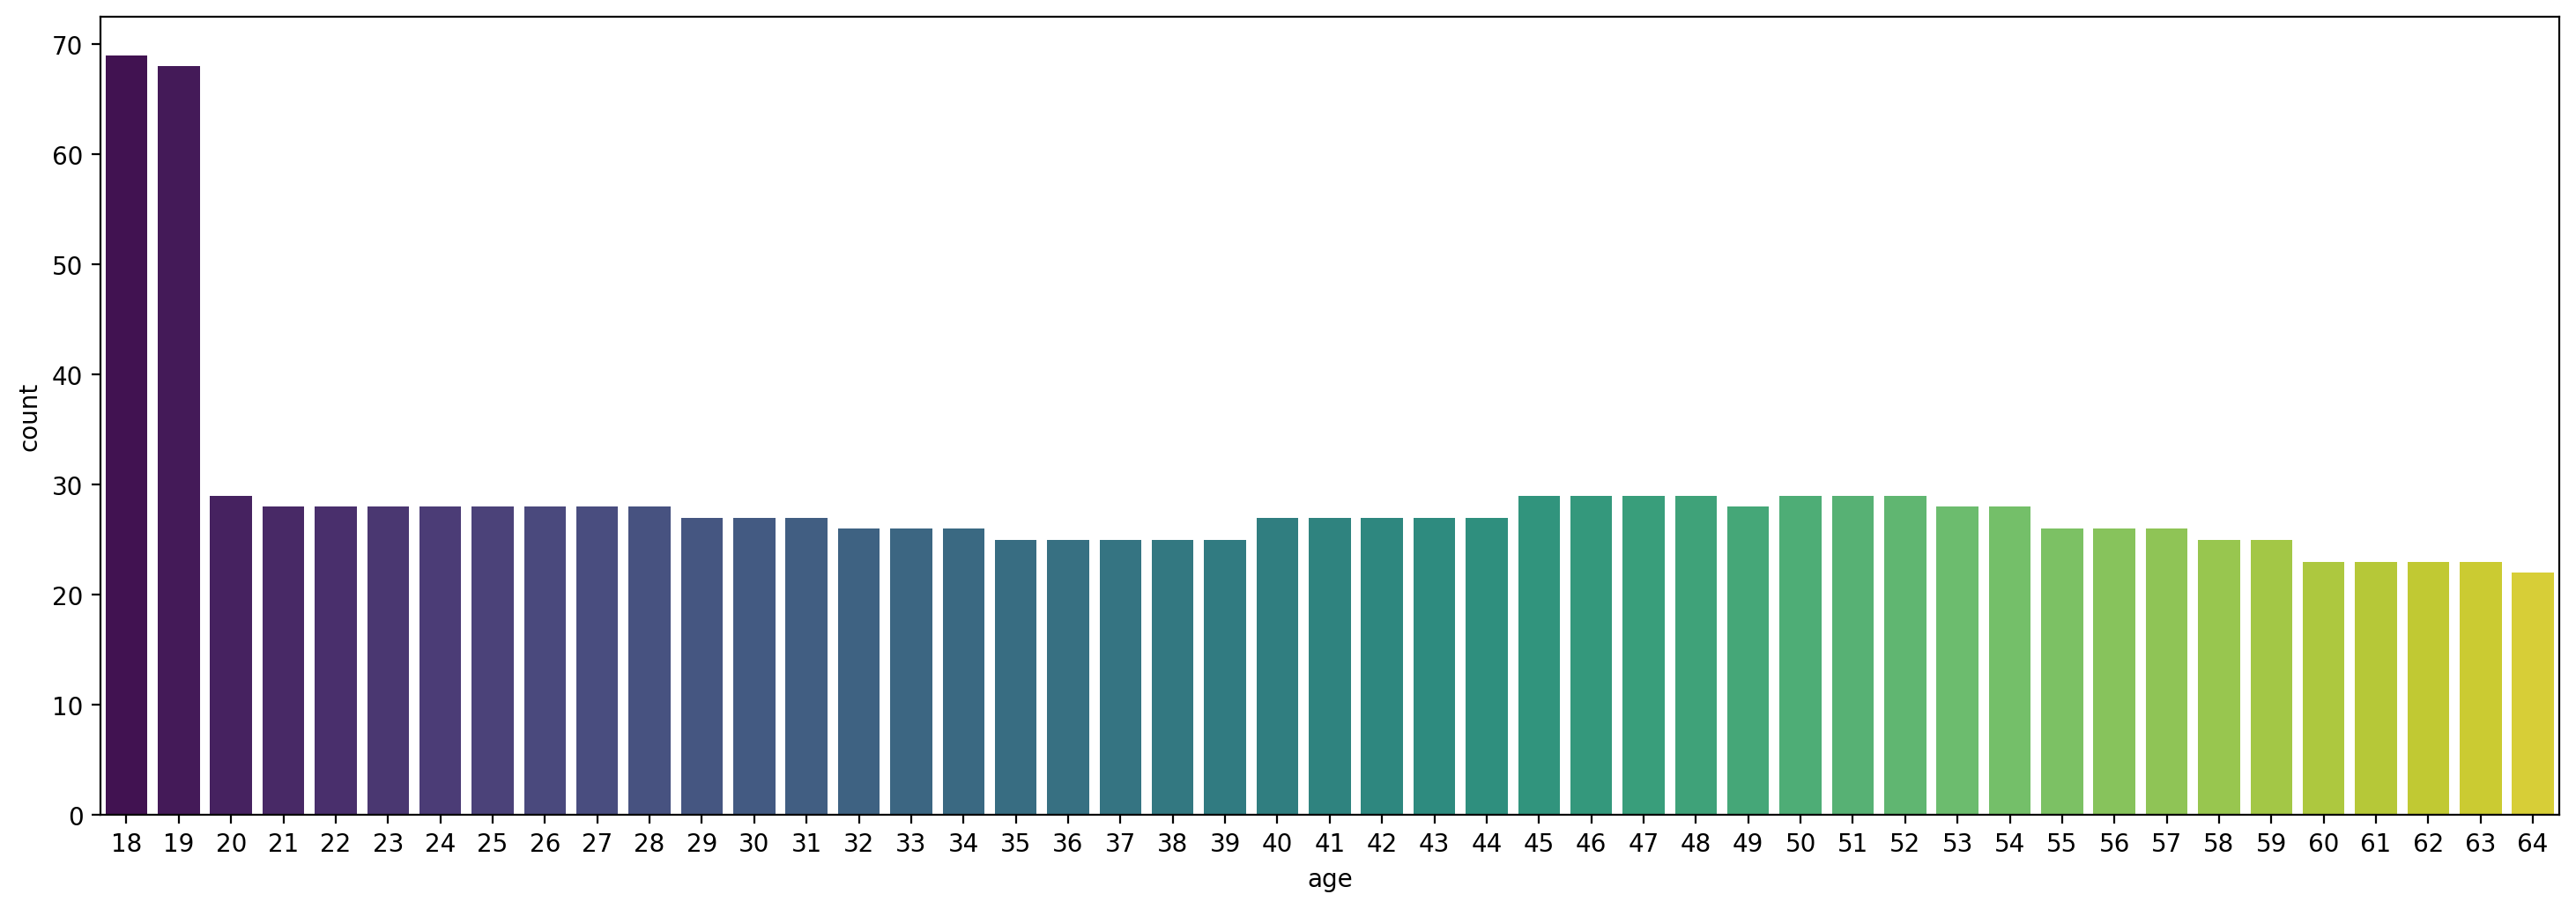

In [34]:
plt.figure(figsize=[18,6],dpi=200)
sns.countplot(x='age',data=df,palette='viridis')
plt.show()

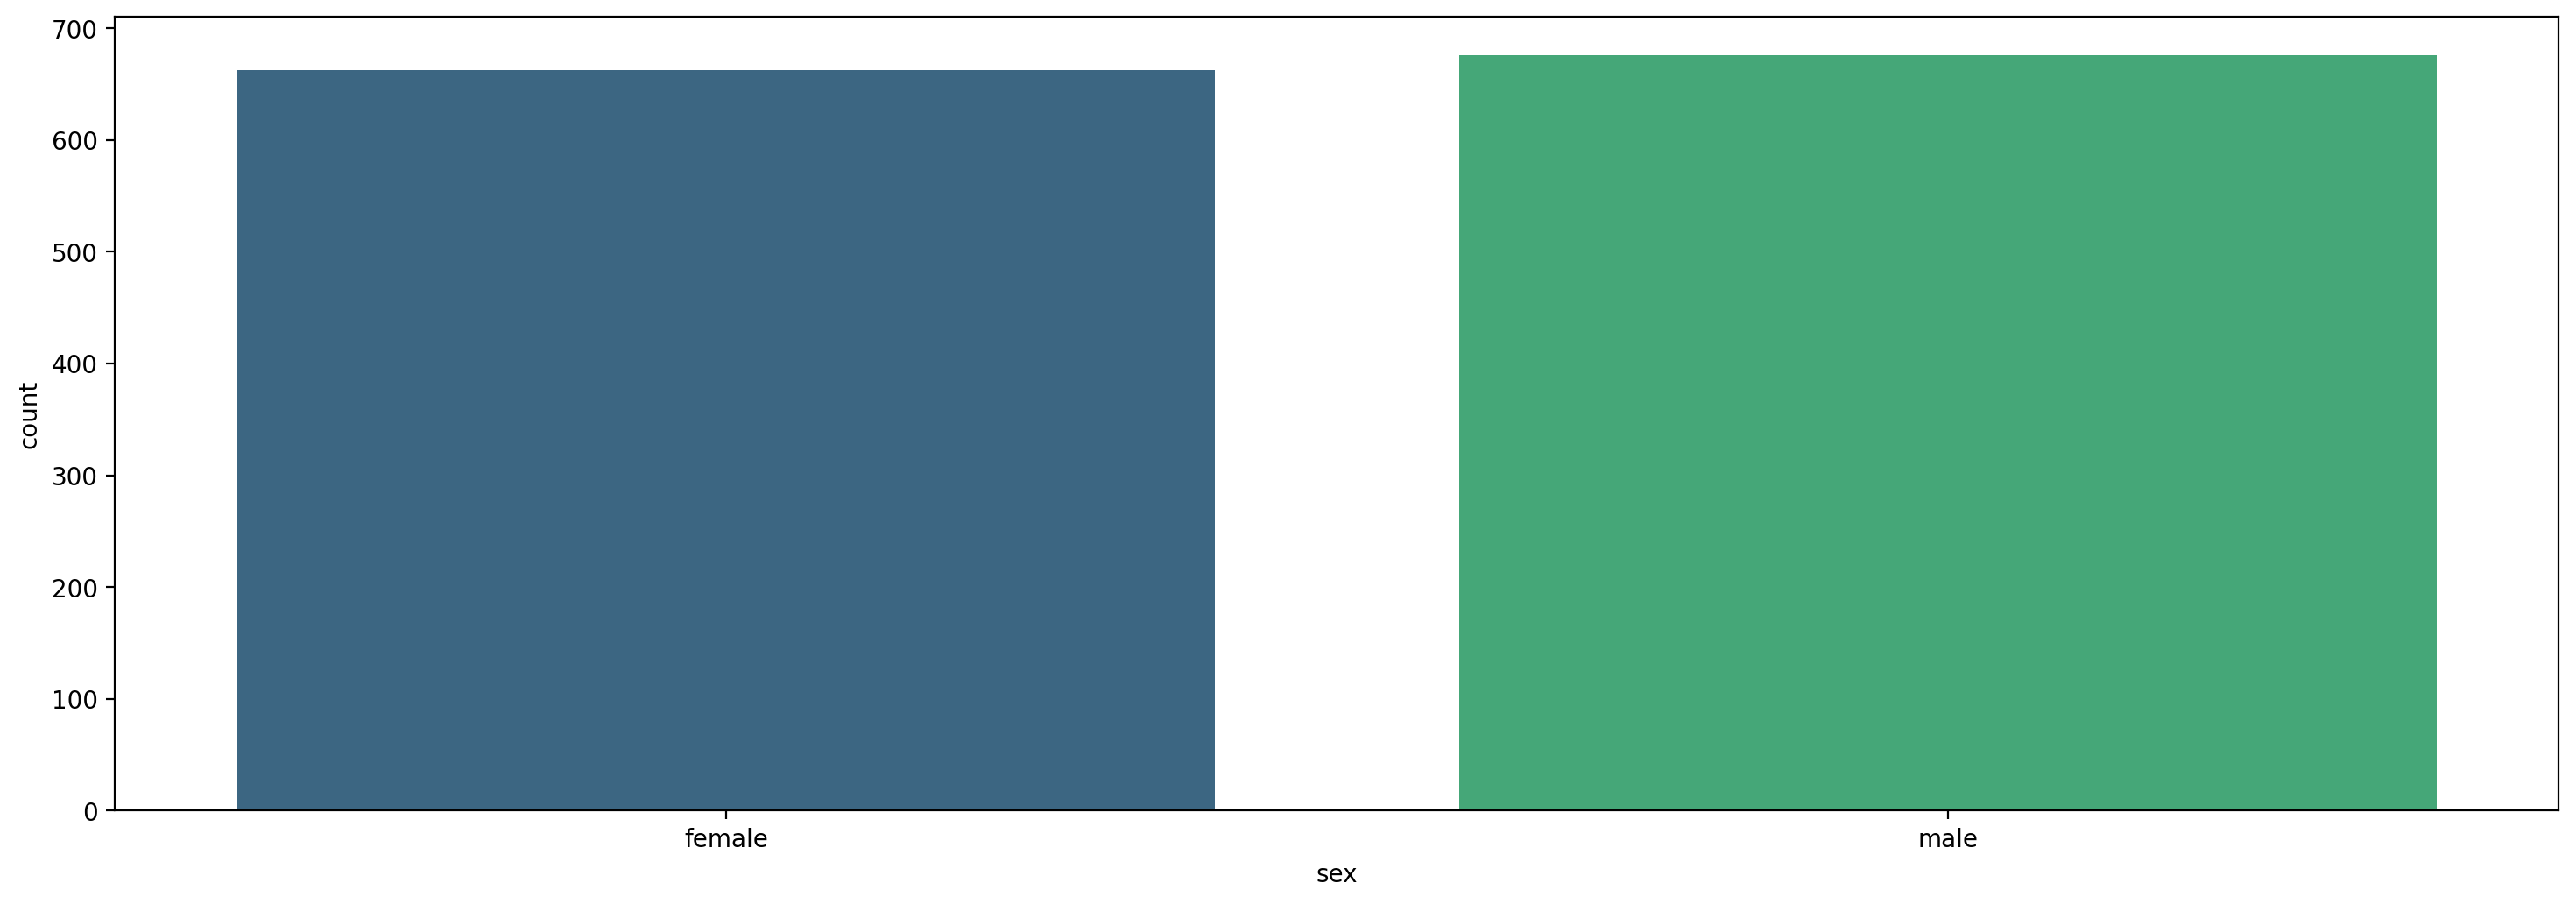

In [35]:
plt.figure(figsize=[18,6],dpi=200)
sns.countplot(x='sex',data=df,palette='viridis')
plt.show()

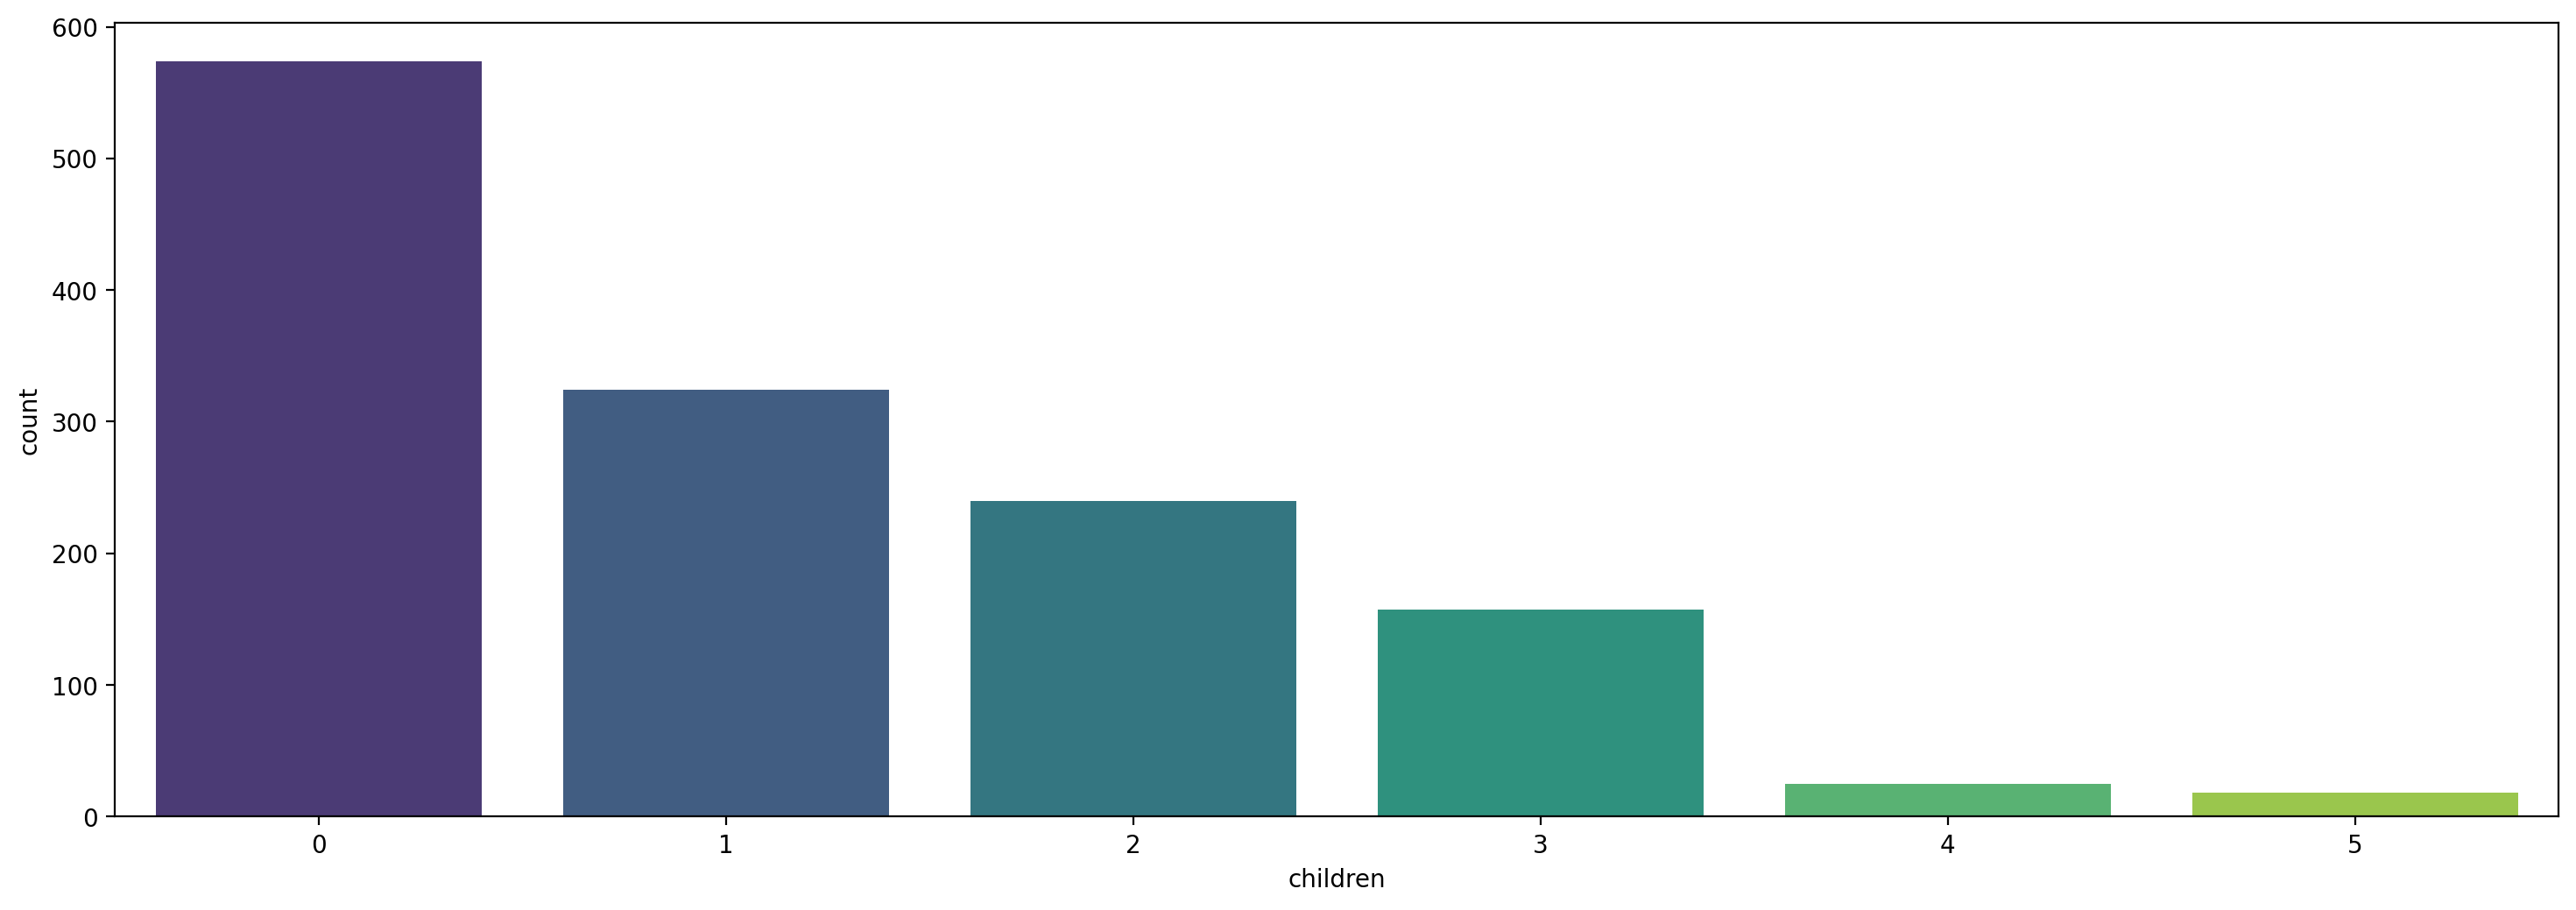

In [36]:
plt.figure(figsize=[18,6],dpi=200)
sns.countplot(x='children',data=df,palette='viridis')
plt.show()

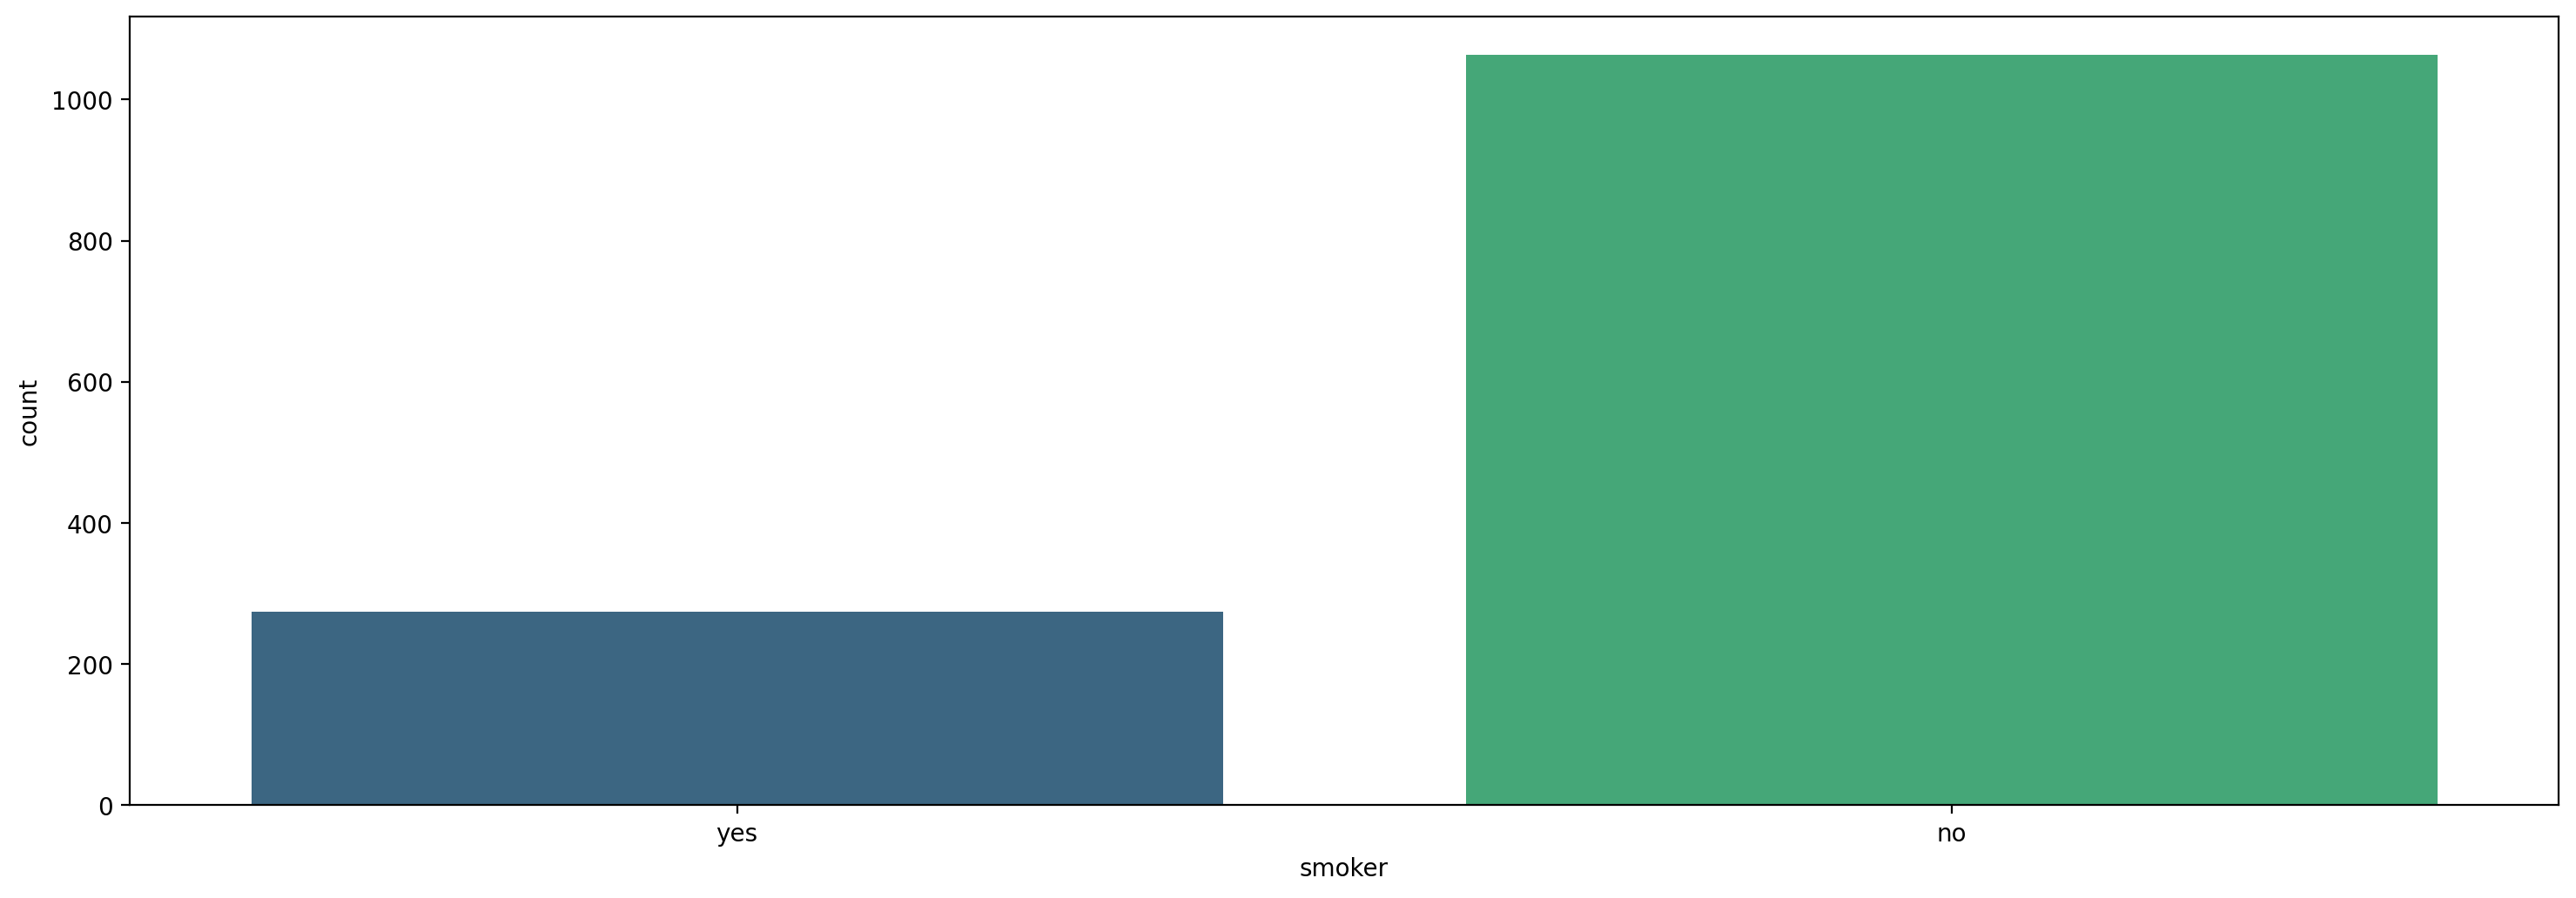

In [37]:
plt.figure(figsize=[18,6],dpi=200)
sns.countplot(x='smoker',data=df,palette='viridis')
plt.show()

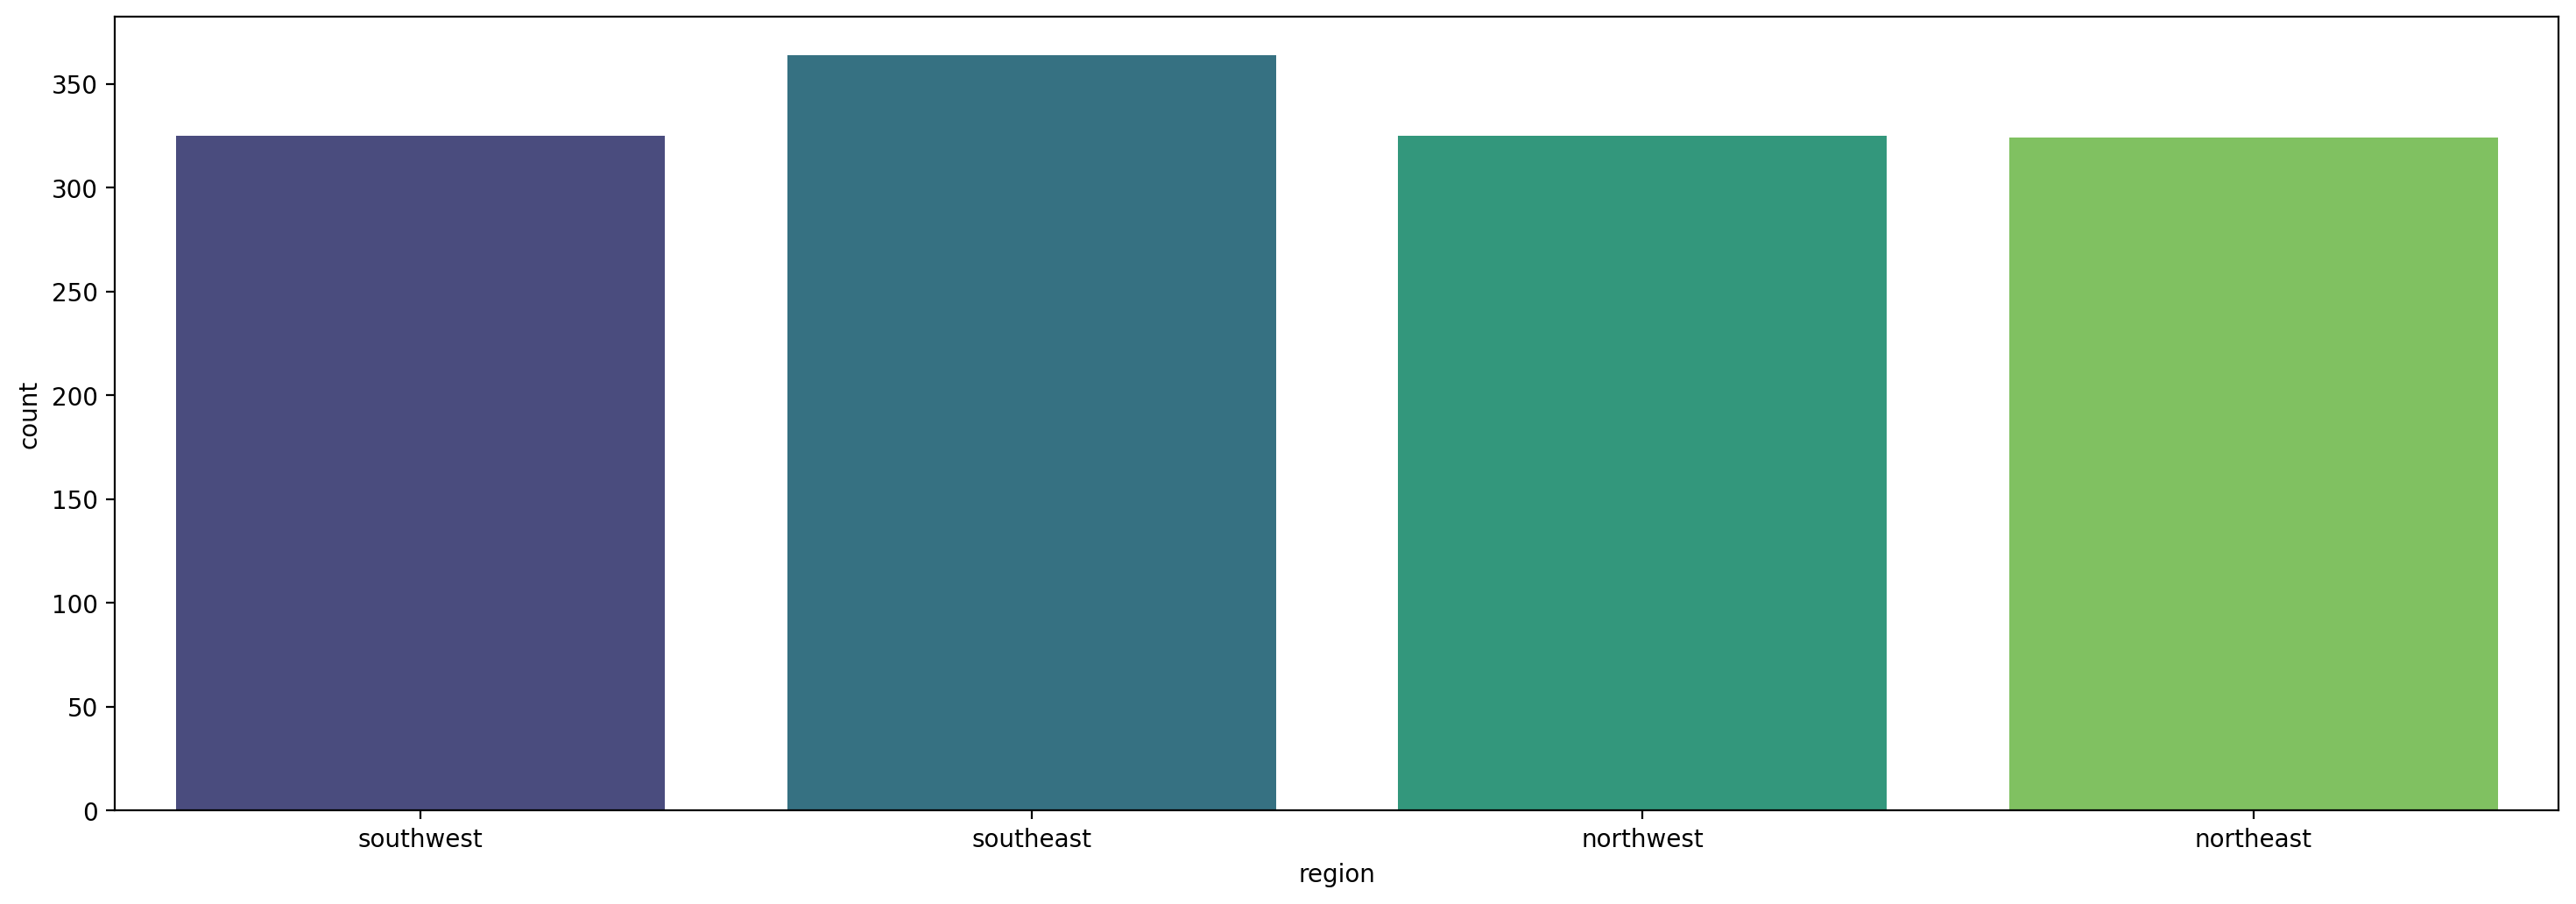

In [38]:
plt.figure(figsize=[18,6],dpi=200)
sns.countplot(x='region',data=df,palette='viridis')
plt.show()

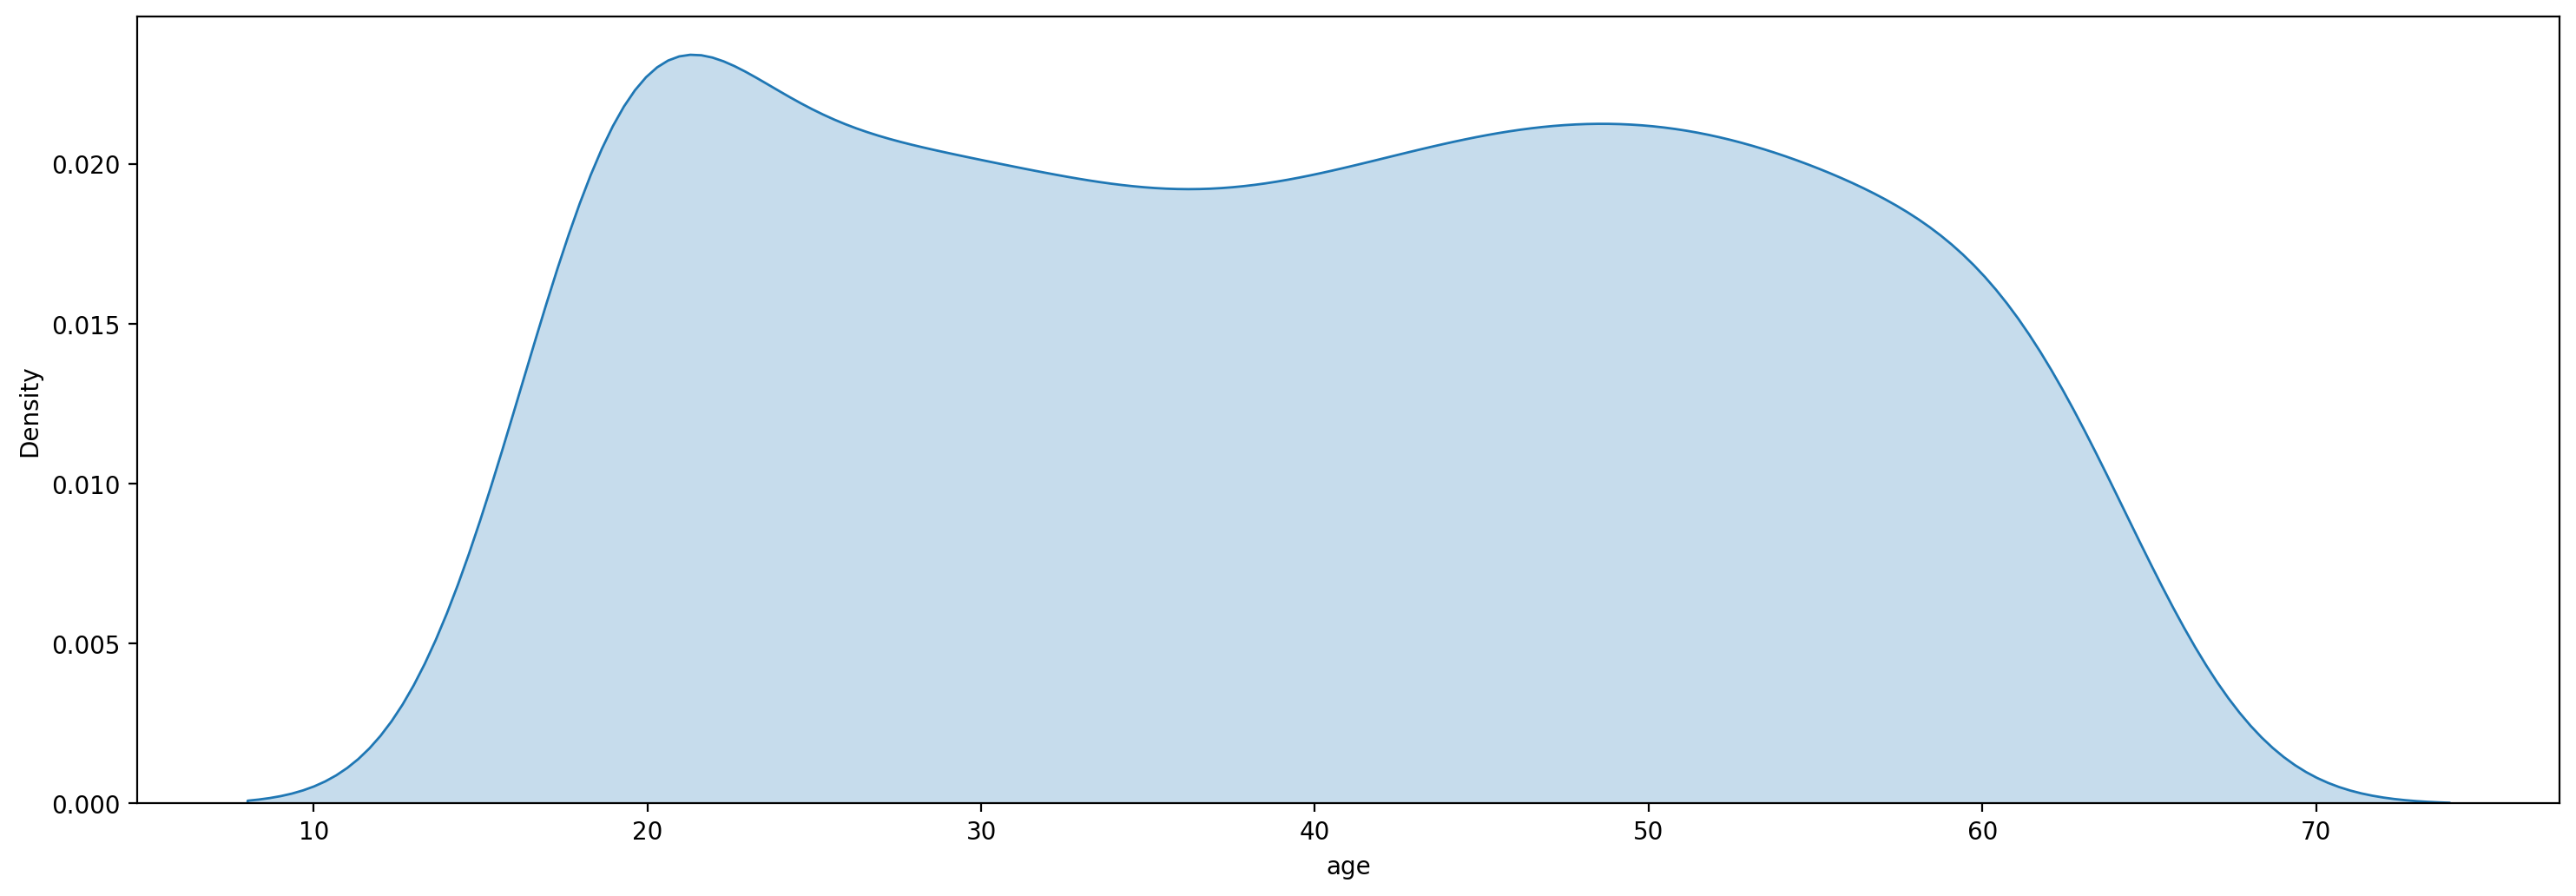

In [39]:
plt.figure(figsize=[18,6],dpi=200)
sns.kdeplot(x='age',data=df,shade=True)
plt.show()

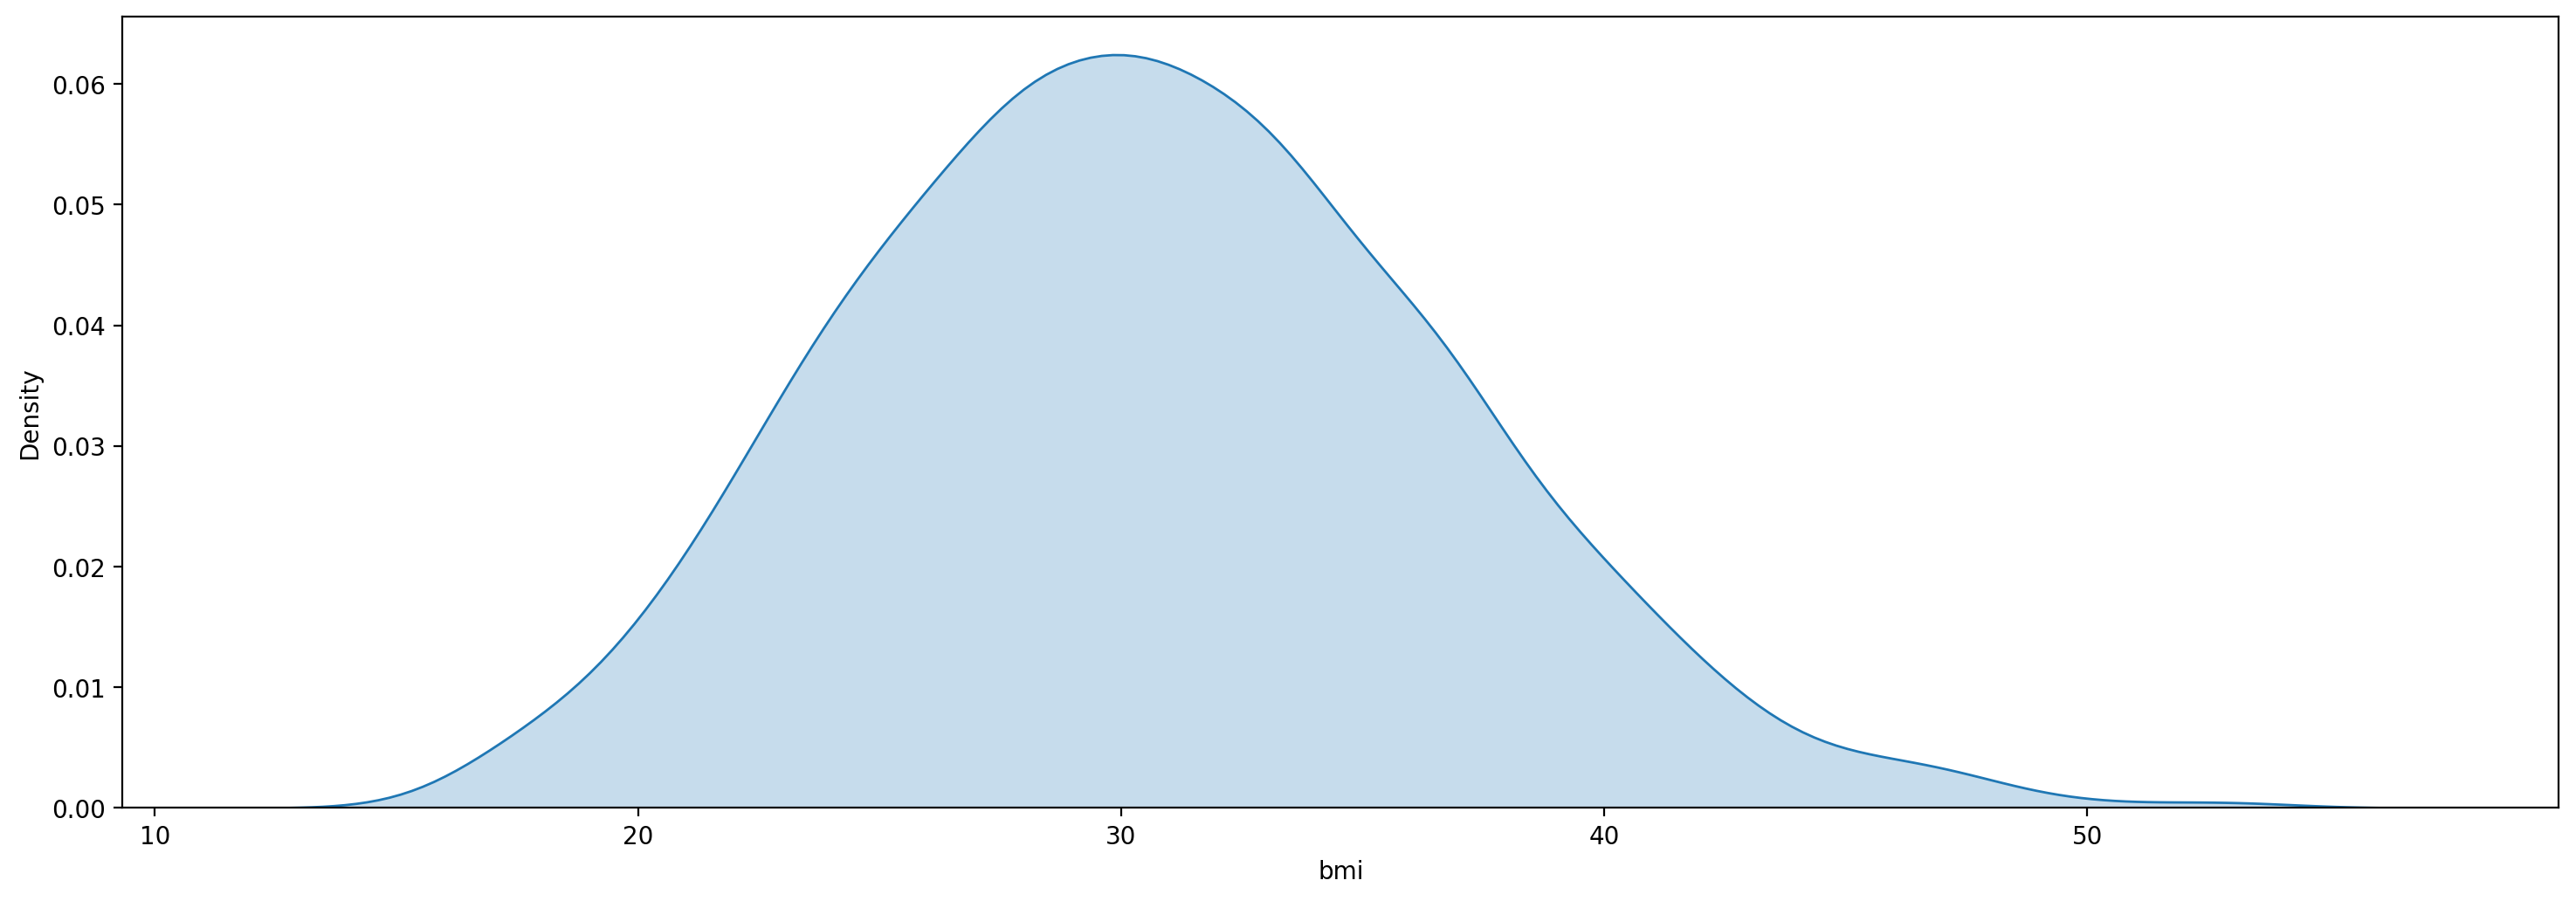

In [40]:
plt.figure(figsize=[18,6],dpi=200)
sns.kdeplot(x='bmi',data=df,shade=True)
plt.show()

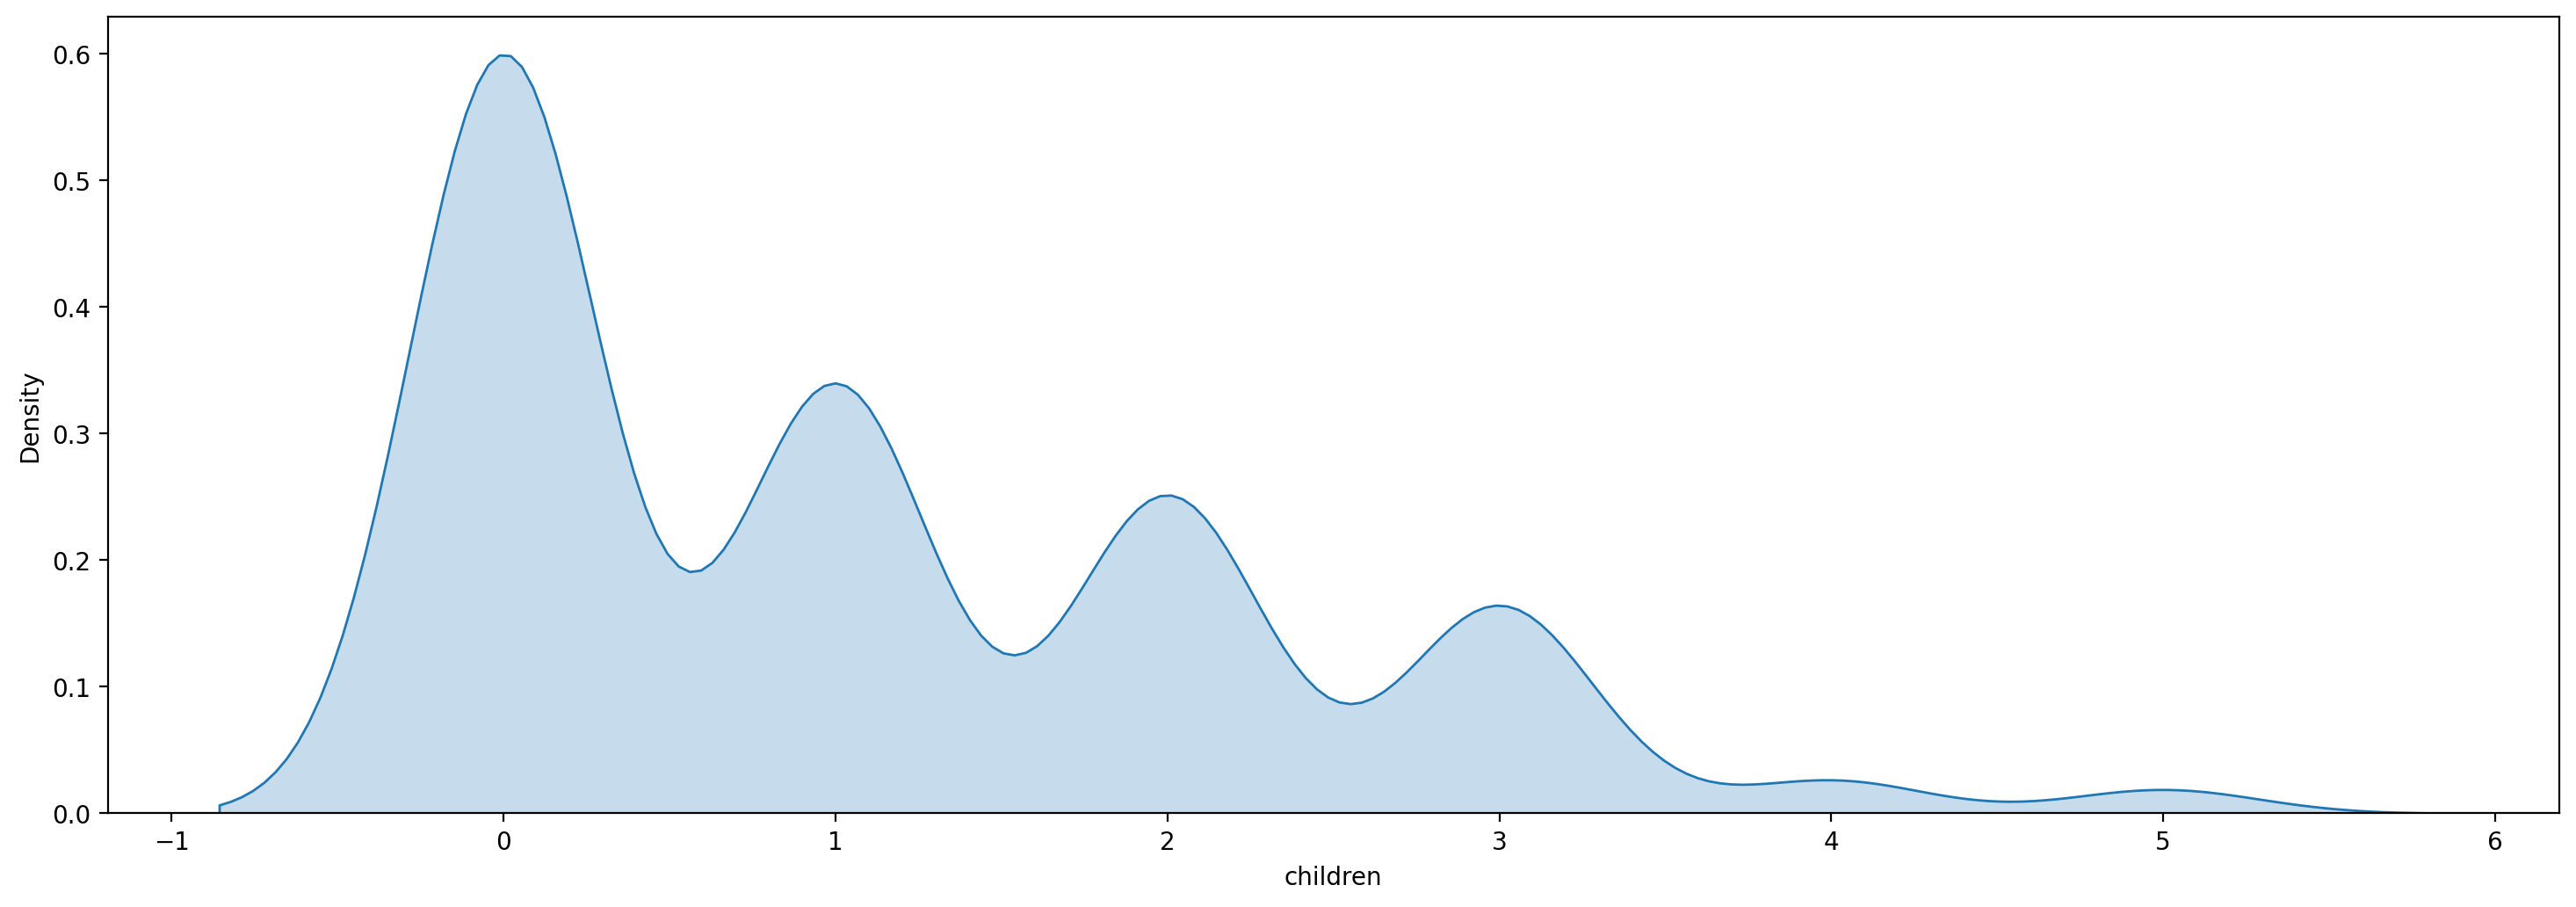

In [41]:
plt.figure(figsize=[18,6],dpi=200)
sns.kdeplot(x='children',data=df,shade=True)
plt.show()

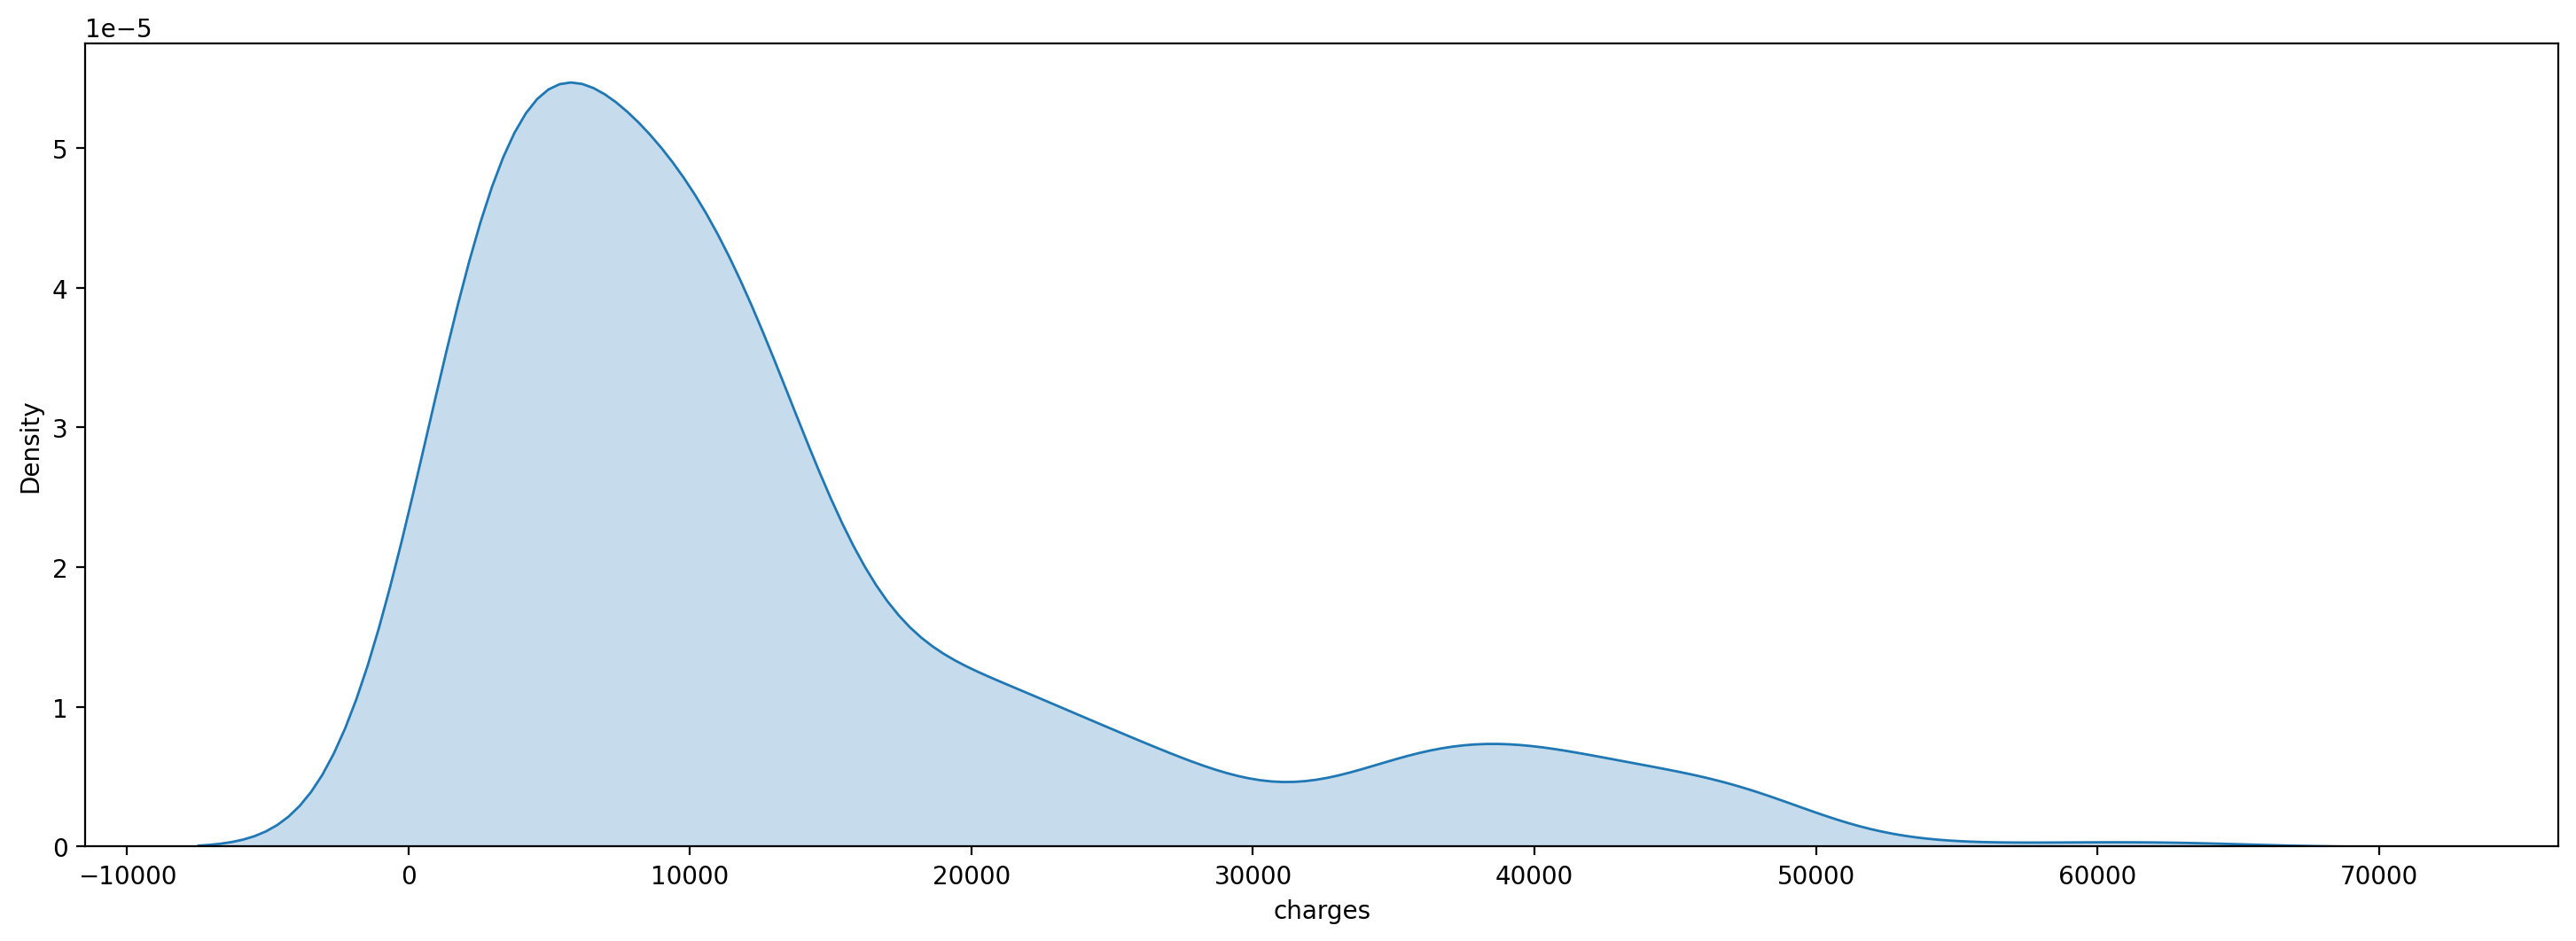

In [42]:
plt.figure(figsize=[18,6],dpi=200)
sns.kdeplot(x='charges',data=df,shade=True)
plt.show()

In [43]:
# skewness
df.skew(axis=0)

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

In [44]:
# kurtosis
df.kurt(axis=0)

age        -1.245088
bmi        -0.050732
children    0.202454
charges     1.606299
dtype: float64

## bivariant

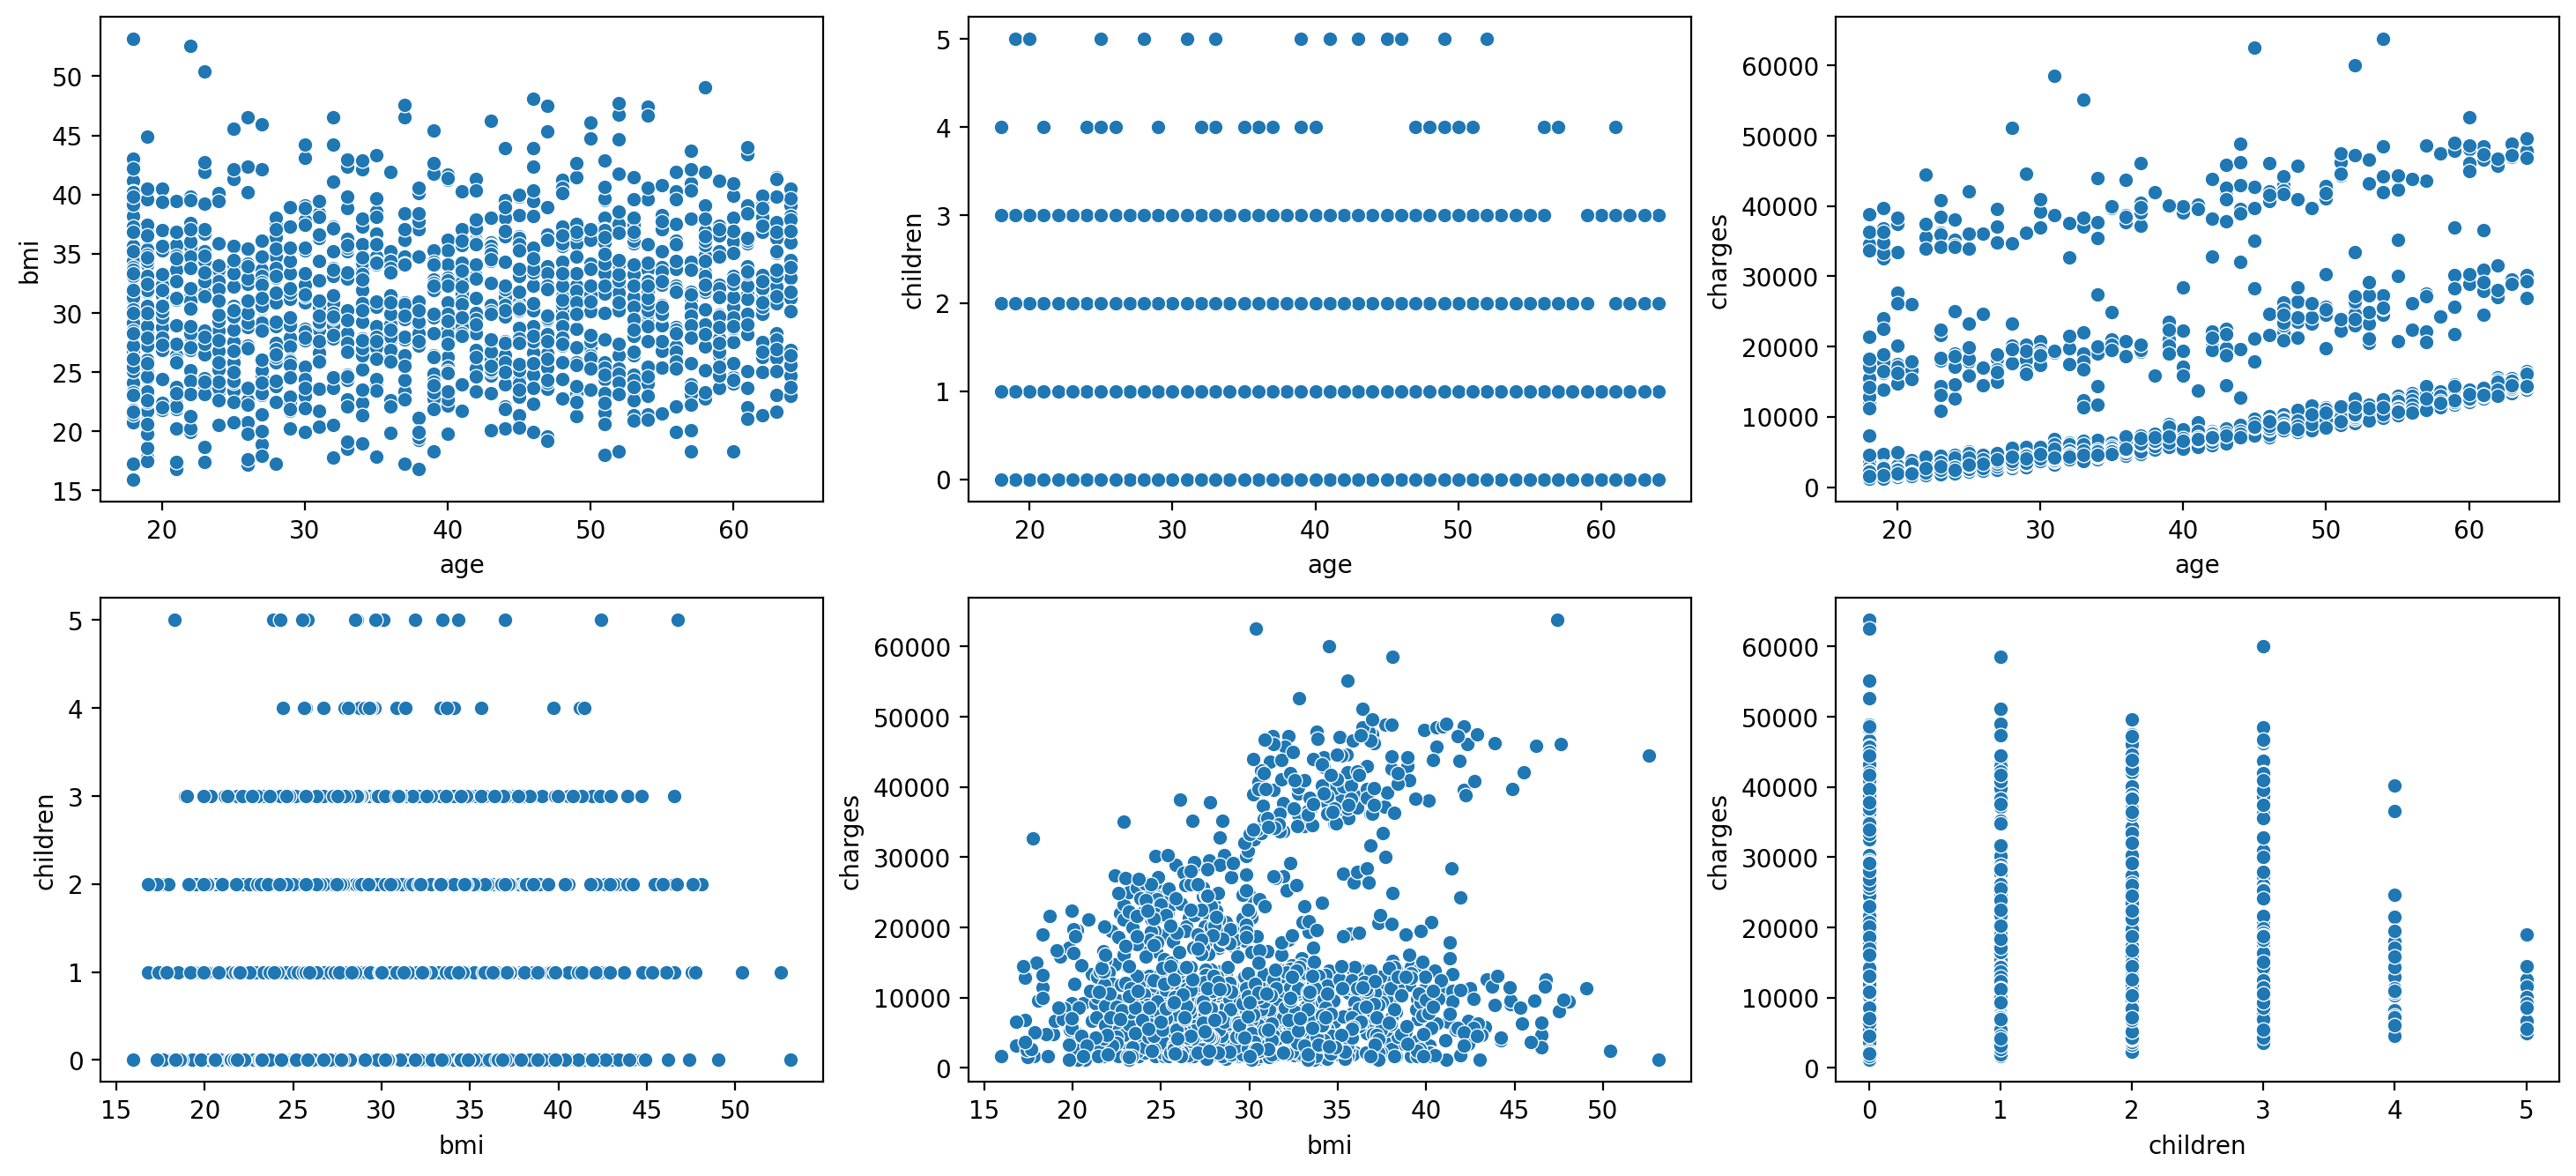

In [51]:
features = list(df.select_dtypes(include=np.number).columns)
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=[18,8],dpi=200)
ax = axes.ravel()
sns.scatterplot(x='age',y='bmi',data=df,ax=ax[0])
sns.scatterplot(x='age',y='children',data=df,ax=ax[1])
sns.scatterplot(x='age',y='charges',data=df,ax=ax[2])
sns.scatterplot(x='bmi',y='children',data=df,ax=ax[3])
sns.scatterplot(x='bmi',y='charges',data=df,ax=ax[4])
sns.scatterplot(x='children',y='charges',data=df,ax=ax[5])
plt.show()

In [82]:
# co-related coefficient
df[['age','bmi']].corr(method='pearson').loc['age']['bmi'],df[['age','bmi']].corr(method='spearman').loc['age']['bmi']

(0.1092718815485351, 0.10773603532023862)

In [83]:
df[['age','children']].corr(method='pearson').loc['age']['children'],df[['age','children']].corr(method='spearman').loc['age']['children']

(0.04246899855884958, 0.056992223562075416)

In [84]:
df[['age','charges']].corr(method='pearson').loc['age']['charges'],df[['age','charges']].corr(method='spearman').loc['age']['charges']

(0.299008193330648, 0.534392133771846)

In [85]:
df[['children','bmi']].corr(method='pearson').loc['children']['bmi'],df[['children','bmi']].corr(method='spearman').loc['children']['bmi']

(0.012758900820673989, 0.015606736191800299)

In [86]:
df[['charges','bmi']].corr(method='pearson').loc['charges']['bmi'],df[['charges','bmi']].corr(method='spearman').loc['charges']['bmi']

(0.19834096883362903, 0.11939590358331145)

In [87]:
df[['children','charges']].corr(method='pearson').loc['children']['charges'],df[['children','charges']].corr(method='spearman').loc['children']['charges']

(0.06799822684790495, 0.13333894319168216)

<Figure size 3200x3200 with 0 Axes>

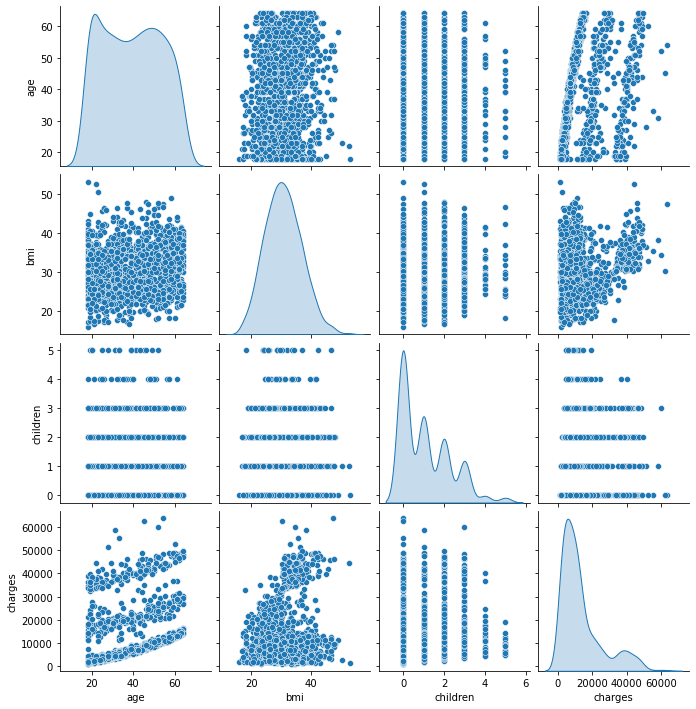

In [91]:
plt.figure(figsize=[16,16],dpi=200)
sns.pairplot(df,diag_kind='kde',kind='scatter')
plt.show()

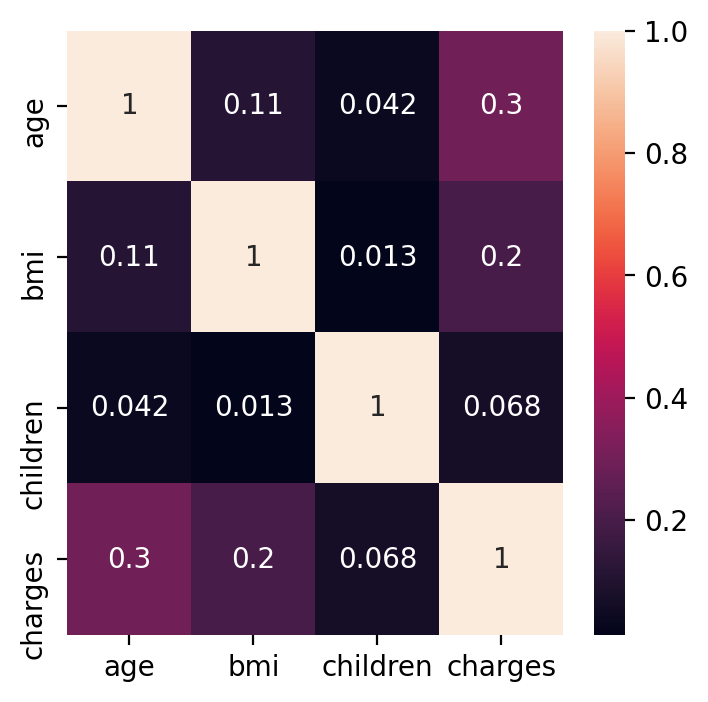

In [94]:
#heatmap
plt.figure(figsize=[4,4],dpi=200)
sns.heatmap(df.corr(),annot=True)
plt.show()

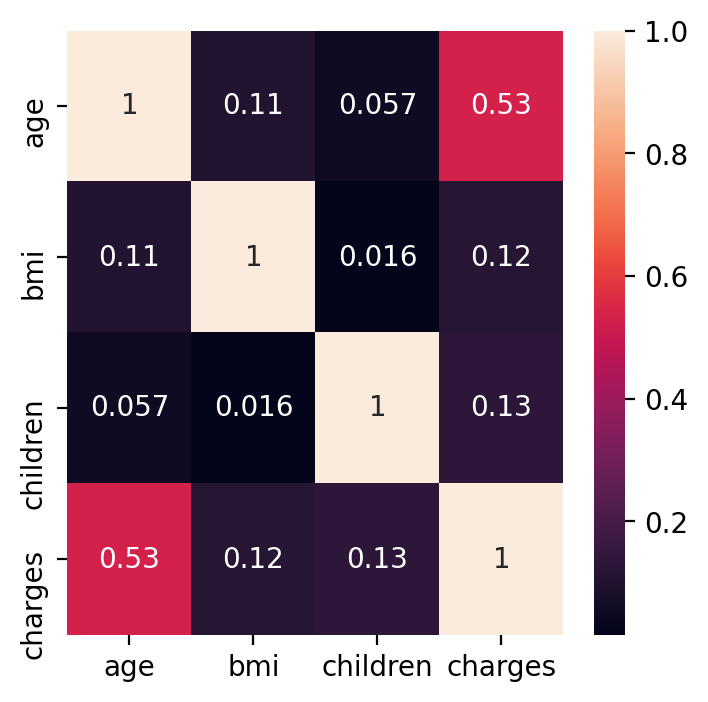

In [95]:
plt.figure(figsize=[4,4],dpi=200)
sns.heatmap(df.corr(method='spearman'),annot=True)
plt.show()